# Final project submission

## **What business problem are you solving?**

**What business problem are you solving?**

“We are solving the problem of anticipating stock market movements to enable investors and financial analysts to make informed investment decisions and manage risks effectively.”

 **Elaboration on the Relevance of the Problem and the Actionability of the Model Output**

Stock market prediction is fundamentally significant for a variety of stakeholders within the financial sector, including individual investors, financial analysts, and institutional investors. The ability to forecast market trends and price movements, even with some accuracy, can lead to substantial economic benefits, through e.g. optimizing portfolio allocation, enhancing return on investments, and minimizing potential losses due to market volatility. In addition, predictive insights gained from such models can guide strategic decision-making processes, such as identifying the opportune moments for buying or selling assets, hedging strategies against market downturns, and exploring new investment opportunities, therefore generating value for the applicant of such models.

The outputs of a stock prediction model are actionable in several ways. Firstly, they can be directly integrated into automated trading systems to execute trades based on predicted price movements (e.g. a trading bot), thereby capitalizing on market inefficiencies before they are corrected. Secondly, they serve as a valuable analytical tool for portfolio managers in diversifying investment strategies and managing portfolio risk more effectively. Lastly, predictive models can also contribute to the broader field of financial analysis by providing empirical evidence to support or refine existing theories in academia about market behavior and the efficiency of financial markets.

Our model aims to predict the closing price of a certain stock right before the markets close in order to make an informed decision whether a stock should be bought, sold or held.

## **What is the machine learning problem that you are solving?**

**What is the ML problem?**

The machine learning problem involves predicting stock prices based on historical stock market data, which is a regression problem aiming to forecast continuous values of stock prices.


**Target Specification**

The target variable in this context is the future stock price of various global brands, derived from a dataset encompassing 100K instances and 12 variables, including historical prices, volume, and other relevant financial indicators.

## **Data exploration and preparation**

#### Preceding Dataset Overview

To analyze our dataset, we are first importing some basic libraries and then importing the data using pandas "read_csv" function. For readability purposes, we are renaming some of our features. Afterwards, we are having a look at the first observations.

In [1]:
 #Importing all libraries
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.stats import zscore, uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, mean_squared_error
from category_encoders import TargetEncoder
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

In [2]:
df_stocks = pd.read_csv("pr13_stocks.csv", index_col=[0])

df_stocks.rename(columns={"Brand_Name": "Brand", "Industry_Tag": "Industry"},inplace=True)
df_stocks.head(10)

,Date,Dividends,Stock Splits,Brand,Ticker,Industry,Country,Volume,Open,High,Low,Close
0,2021-01-25 00:00:00-05:00,0.0,0.0,crocs,CROX,footwear,usa,1102500.0,73.180000,74.750000,71.050003,73.910004
1,2019-09-12 00:00:00-04:00,0.0,0.0,target,TGT,retail,usa,3185700.0,100.810594,101.077753,99.999911,100.359192
2,2015-12-29 00:00:00-05:00,0.0,0.0,unilever,UL,consumer goods,netherlands,1278700.0,33.785507,33.970634,33.700657,33.908924
3,2014-06-13 00:00:00-04:00,0.0,0.0,amd,AMD,technology,usa,17734600.0,4.360000,4.390000,4.240000,4.280000
4,2017-10-06 00:00:00-04:00,0.0,0.0,the walt disney company,DIS,entertainment,usa,4360200.0,96.426167,96.734885,95.837672,96.541939
5,2021-04-22 00:00:00-04:00,0.0,0.0,block,SQ,financial services,usa,12730800.0,246.460007,255.804993,242.710007,245.110001
6,2011-11-28 00:00:00-05:00,0.0,0.0,toyota,TM,automotive,japan,620500.0,56.368566,56.623509,56.175161,56.412518
7,2014-10-27 00:00:00-04:00,0.0,0.0,3m,MMM,manufacturing,usa,2840000.0,110.508109,111.716997,109.948442,111.605057
8,2018-02-23 00:00:00-05:00,0.0,0.0,unilever,UL,consumer goods,netherlands,884800.0,43.724312,43.732587,43.418082,43.666374
9,2016-05-25 00:00:00-04:00,0.0,0.0,nike,NKE,apparel,usa,9921500.0,52.051743,52.254527,51.406511,51.609299


Next, we are printing the number of observations our dataset has.

In [3]:
original_dataset_length = len(df_stocks)
print("The original dataset has", original_dataset_length, "data instances")

The original dataset has 100000 data instances


And are checking the feature and data types of our features (and targets) to know, how to deal with them later.

In [4]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          99984 non-null  object 
 1   Dividends     99941 non-null  float64
 2   Stock Splits  99542 non-null  float64
 3   Brand         99775 non-null  object 
 4   Ticker        99825 non-null  object 
 5   Industry      99966 non-null  object 
 6   Country       99900 non-null  object 
 7   Volume        99148 non-null  float64
 8   Open          99197 non-null  float64
 9   High          99336 non-null  float64
 10  Low           99319 non-null  float64
 11  Close         99806 non-null  float64
dtypes: float64(7), object(5)
memory usage: 9.9+ MB


We can see that our dataset has 12 features. 7 features are numerical and 5 are categorial, namely "Date", "Brand", "Ticker", "Industry" and "Country".

#### Exploration

##### Exploring categorical features & their distribution

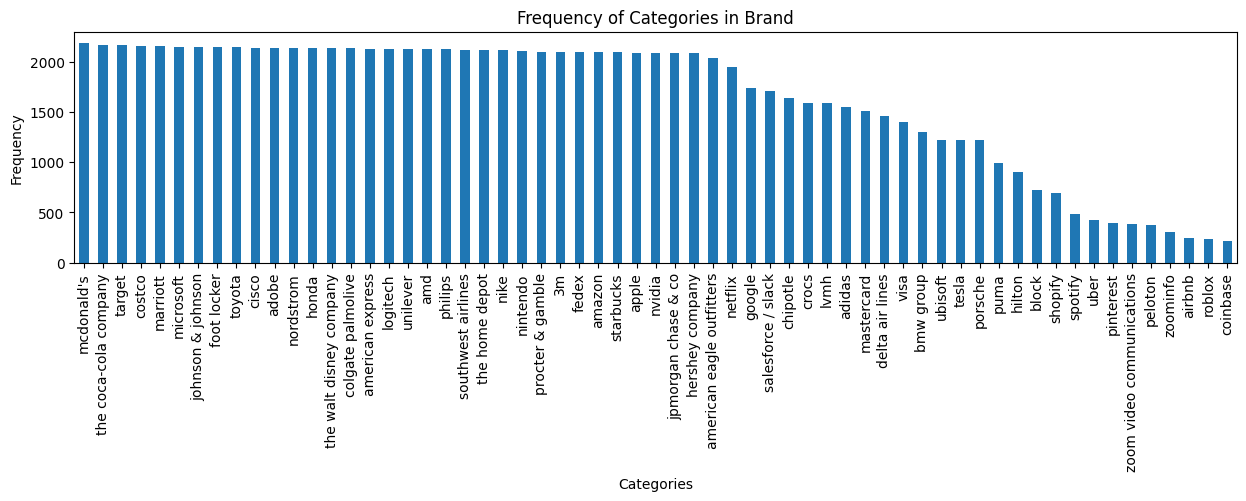

Frequency table for Brand :
                    Category  Frequency  Relative Frequency
0                mcdonald's       2192             0.02192
1     the coca-cola company       2171             0.02171
2                    target       2169             0.02169
3                    costco       2162             0.02162
4                  marriott       2154             0.02154
5                 microsoft       2151             0.02151
6         johnson & johnson       2150             0.02150
7               foot locker       2146             0.02146
8                    toyota       2144             0.02144
9                     cisco       2141             0.02141
10                    adobe       2140             0.02140
11                nordstrom       2139             0.02139
12                    honda       2139             0.02139
13  the walt disney company       2137             0.02137
14        colgate palmolive       2137             0.02137
15         american express

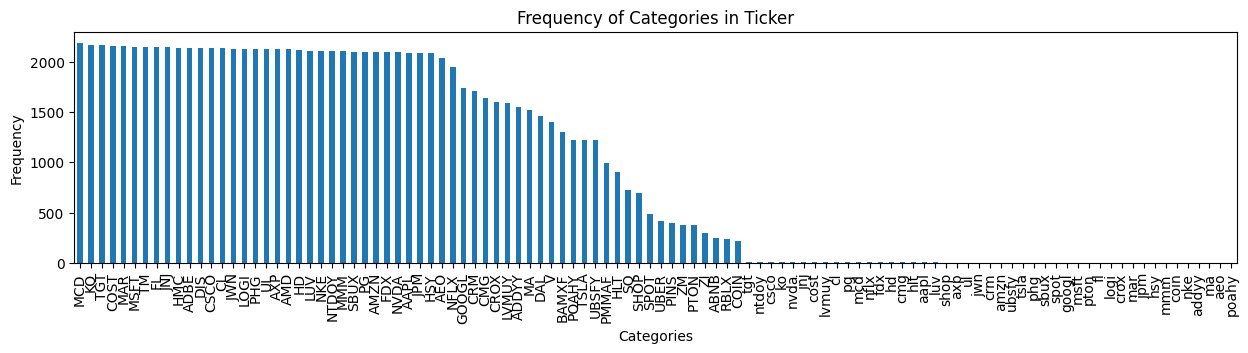

Frequency table for Ticker :
    Category  Frequency  Relative Frequency
0       MCD       2191             0.02191
1        KO       2167             0.02167
2       TGT       2167             0.02167
3      COST       2158             0.02158
4       MAR       2157             0.02157
5      MSFT       2152             0.02152
6        TM       2150             0.02150
7        FL       2148             0.02148
8       JNJ       2146             0.02146
9       HMC       2142             0.02142
10     ADBE       2139             0.02139
11      DIS       2135             0.02135
12     CSCO       2135             0.02135
13       CL       2134             0.02134
14      JWN       2132             0.02132
15     LOGI       2130             0.02130
16      PHG       2129             0.02129
17       UL       2128             0.02128
18      AXP       2128             0.02128
19      AMD       2124             0.02124
20       HD       2114             0.02114


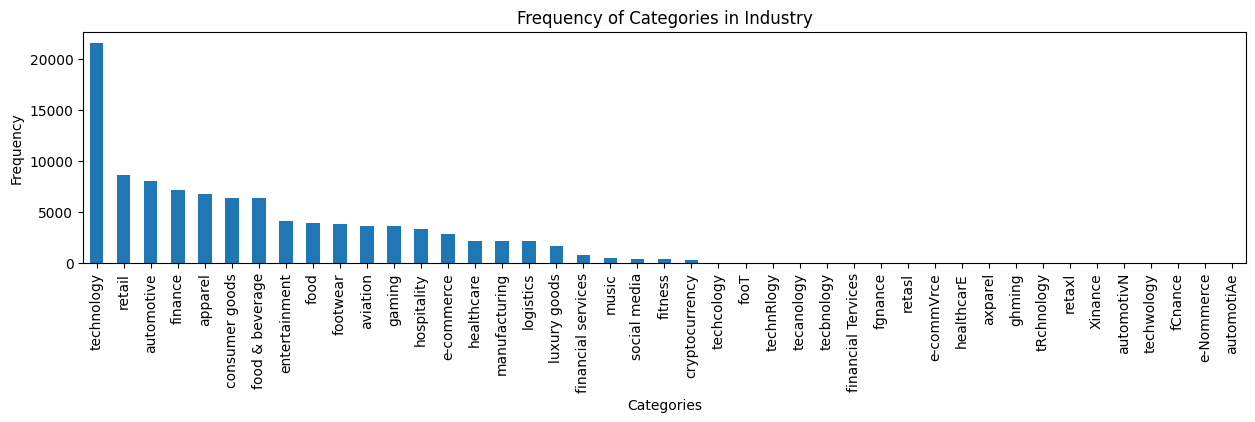

Frequency table for Industry :
               Category  Frequency  Relative Frequency
0           technology      21578             0.21578
1               retail       8600             0.08600
2           automotive       8047             0.08047
3              finance       7147             0.07147
4              apparel       6709             0.06709
5       consumer goods       6380             0.06380
6      food & beverage       6372             0.06372
7        entertainment       4095             0.04095
8                 food       3836             0.03836
9             footwear       3750             0.03750
10            aviation       3583             0.03583
11              gaming       3575             0.03575
12         hospitality       3312             0.03312
13          e-commerce       2797             0.02797
14          healthcare       2153             0.02153
15       manufacturing       2106             0.02106
16           logistics       2106             0.02

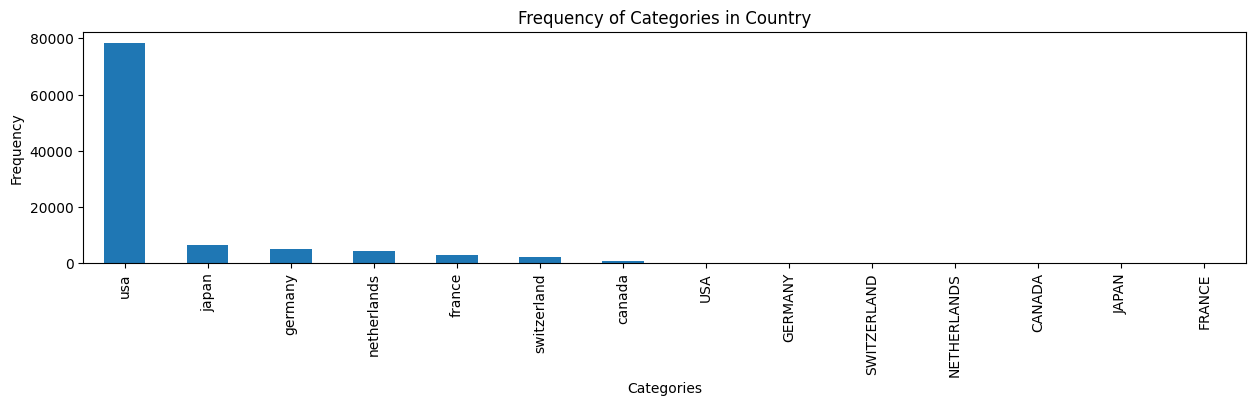

Frequency table for Country :
        Category  Frequency  Relative Frequency
0           usa      78427             0.78427
1         japan       6406             0.06406
2       germany       5069             0.05069
3   netherlands       4256             0.04256
4        france       2821             0.02821
5   switzerland       2126             0.02126
6        canada        695             0.00695
7           USA         80             0.00080
8       GERMANY          7             0.00007
9   SWITZERLAND          5             0.00005
10  NETHERLANDS          4             0.00004
11       CANADA          2             0.00002
12        JAPAN          1             0.00001
13       FRANCE          1             0.00001


In [5]:
#Exploring categorial features, their categories and category frequency
categorical_features = ['Brand', 'Ticker', 'Industry', 'Country']

# Iterate through each categorical feature
for feature in categorical_features:
    # Get the frequency of each category
    category_counts = df_stocks[feature].value_counts()

    # Calculate relative frequency
    total_instances = len(df_stocks)
    relative_frequency = category_counts / total_instances

    # Plot the frequency of each category
    plt.figure(figsize=(15, 3))
    category_counts.plot(kind='bar')
    plt.title('Frequency of Categories in ' + feature)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

    # Print the frequency table
    frequency_table = pd.DataFrame({
        'Category': category_counts.index,
        'Frequency': category_counts.values,
        'Relative Frequency': relative_frequency.values
    })

    tabl_x = frequency_table.head(21)

    print("Frequency table for", feature, ":\n", tabl_x)

The bar charts and accompanying frequency tables display a comprehensive overview of various categories across brands, stock tickers, industries, and countries. The frequency among about the first 40 Brands is closely aligned, suggesting a competitive visibility among leading brands. In such a dataset, every trading day could potentially record a price for each stock, leading to a similar number of data points across different brands, with some brands being traded at the market earlier or later due to their dates of IPO. In the ticker category, similar patterns are observed, indicating possible correlations to the brand mentions. The slight differences between frequencies of brands and tickers are due to misspellings or lower capitalization in the feature, which led to the account of a lowercase ticker as a different one that the capitalized one (we will account for that when cleaning the data).

A significant shift is seen in the industry category, where technology vastly outnumbers others like retail and automotive, highlighting its predominant influence or mention in the dataset. Contrasting with the relatively close numbers in brands and tickers, industries display a wider range of frequencies, showcasing diversity in the presence and mention of different industry sectors.

The country distribution is heavily skewed towards the USA, which overwhelmingly surpasses other countries such as Japan and Germany, underlining a strong concentration of mentions or activities tied to the United States in the dataset. This seems reasonable since mostly US companies are traded on the US exchange market.

Overall, these visualizations reflect the nuances of distribution and prominence across different sectors and geographies, with some categories exhibiting tight competition while others reveal clear leaders or dominant players. The overrepresentation of datapoints from the USA and the technology sector, might lead to the model being better in predicting stock market prices for datapoints with those feature values. The relative frequency data aids in understanding the proportional representation, particularly useful where the absolute numbers are vastly different, ensuring an apples-to-apples comparison across diverse datasets.

##### Exploring numerical features & their distribution

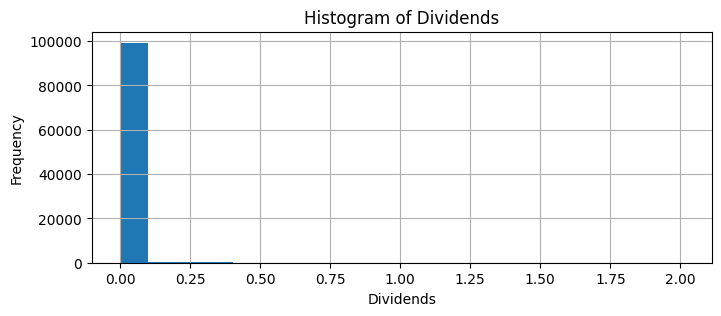

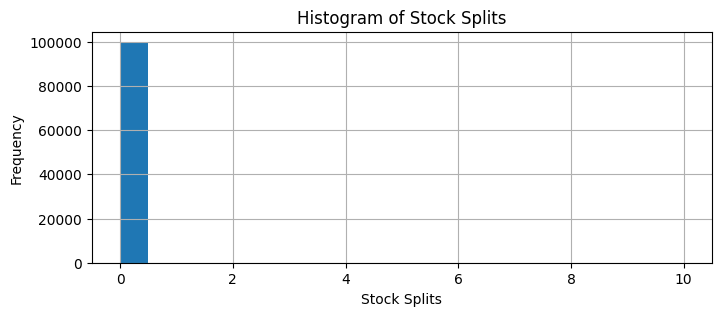

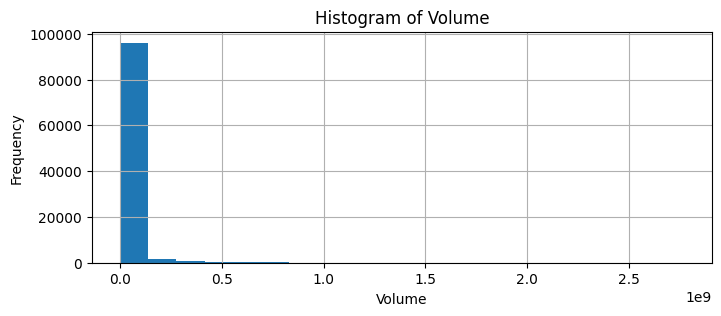

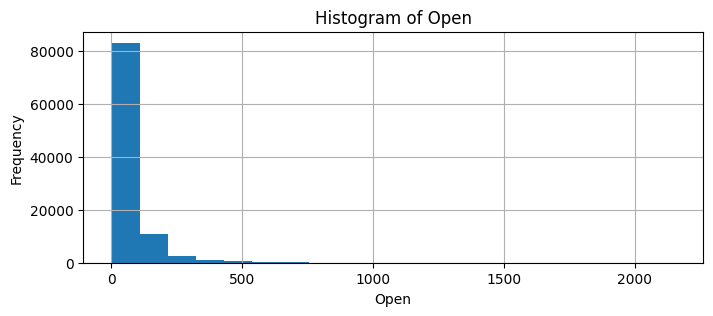

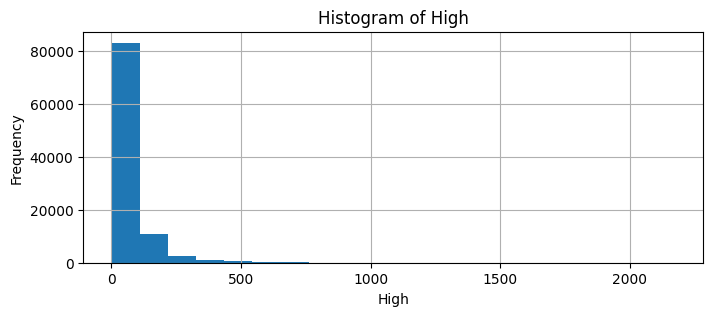

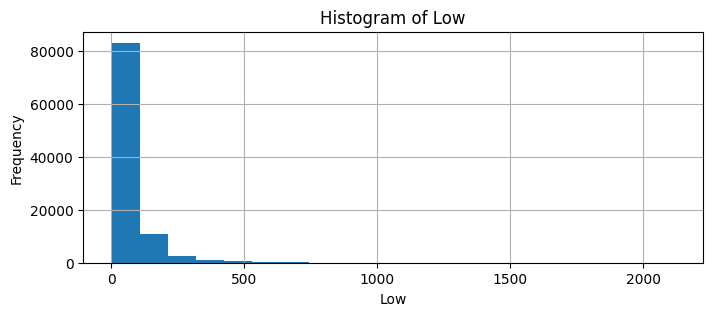

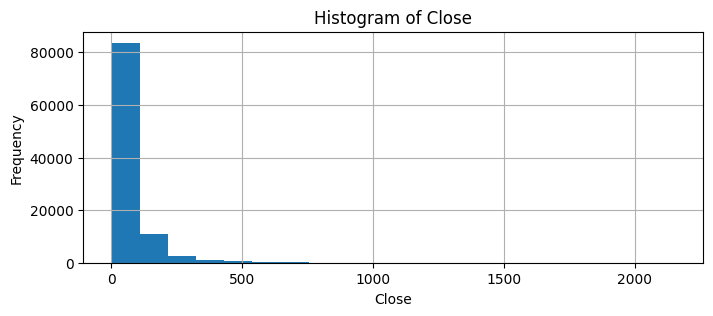

In [6]:
#Exploring numerical features and their distribution
numerical_features = ['Dividends', 'Stock Splits', 'Volume', 'Open', 'High', 'Low', 'Close']

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    plt.hist(df_stocks[feature], bins=20)
    plt.title('Histogram of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

The histograms present the distribution of several numerical stock market features—Dividends, Stock Splits, Volume, and stock prices (Open, High, Low, Close). Both Dividends and Stock Splits show a concentration of data at lower frequencies, reflecting their infrequent occurrence in the dataset, as companies typically issue dividends periodically and perform stock splits occasionally. Similarly, the trading Volume is skewed towards the lower end, indicating that a large number of stocks are traded in smaller quantities, with high-volume trading being less common. The price features—Open, High, Low, and Close—all exhibit right-skewed distributions, meaning most stock prices are lower, with a tail of few stocks having very high prices, likely due to the influence of high-valued stocks from dominant companies or sectors. These distributions underscore the prevalent market characteristic where lower-valued stock occurrences are more common, while high-value instances are relatively rare.

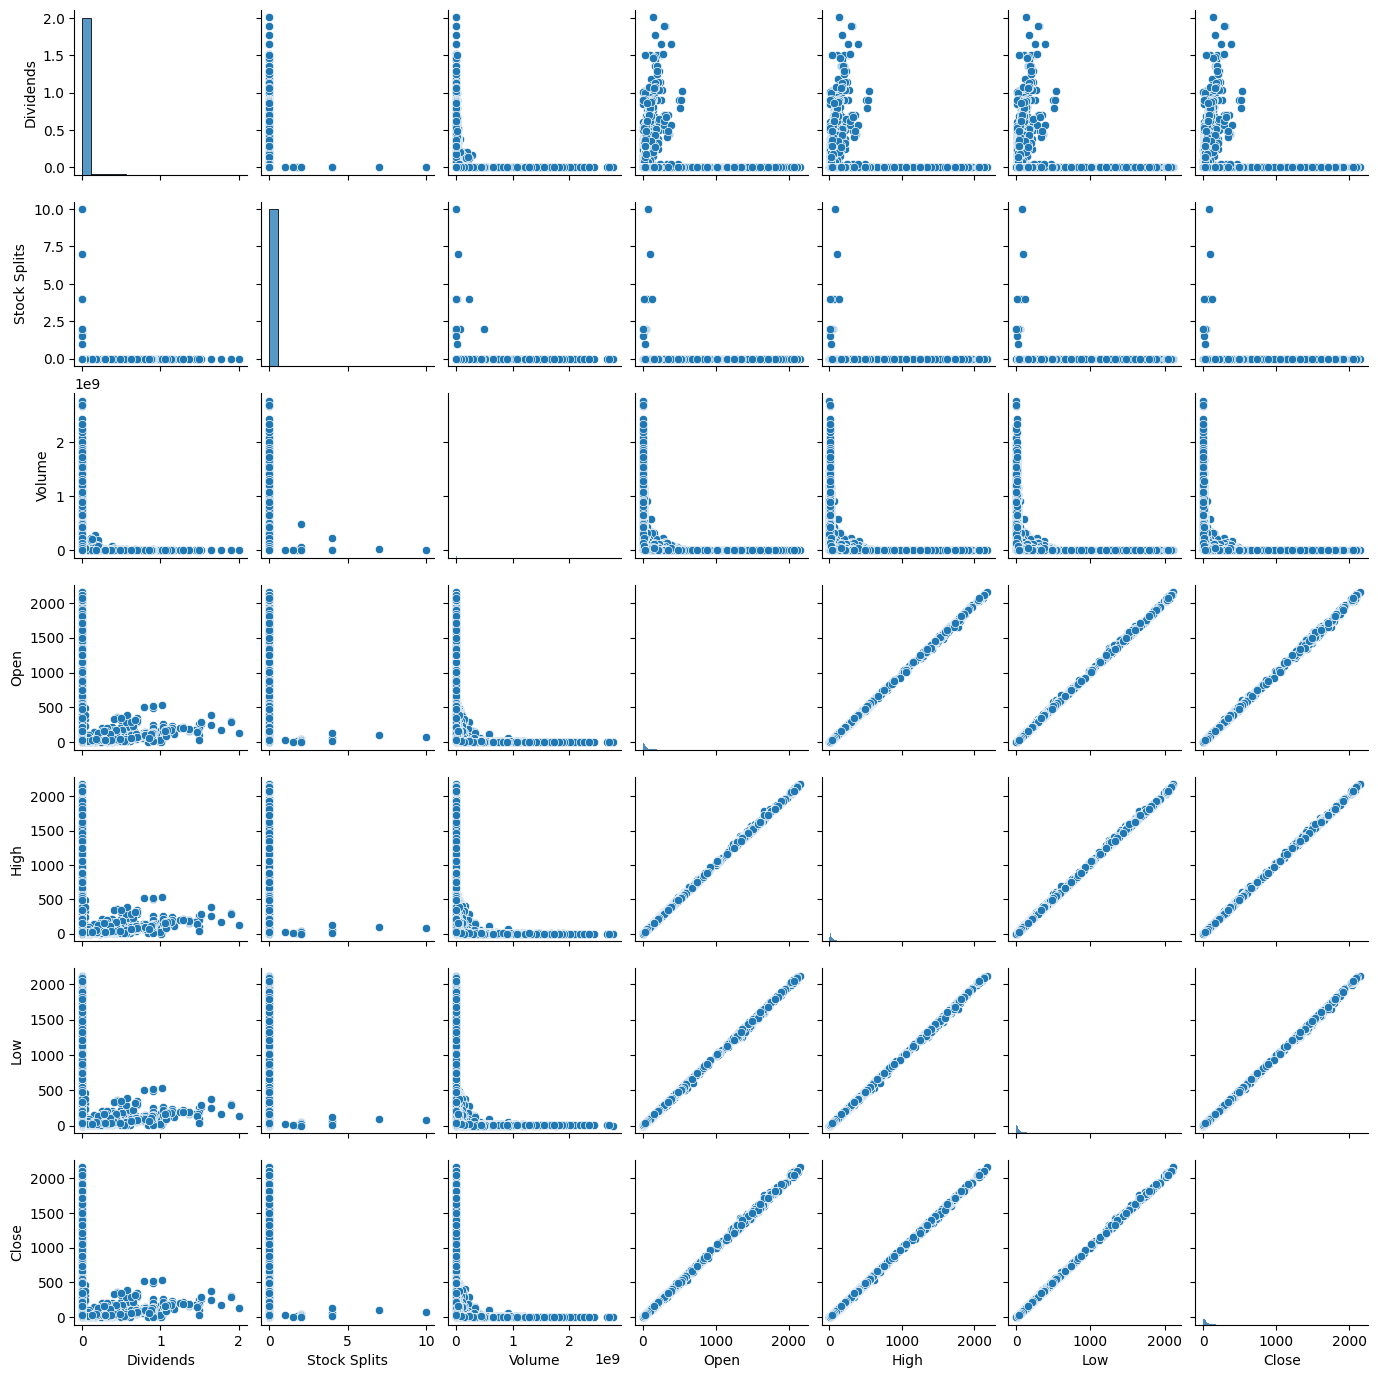

In [7]:
#Exploring the relationship between numerical features
sns.pairplot(df_stocks[numerical_features], height = 2)
plt.show()

This matrix of scatter plots provides a pairwise comparison among various numerical stock market features: Dividends, Stock Splits, Volume, Open, High, Low, and Close prices. The diagonal plots, which would typically show the distribution of each variable, are omitted, focusing our attention on the relationships between pairs. Notably, the Open, High, Low, and Close prices show strong linear correlations with each other, as expected since these variables are all related to daily stock price movements. In contrast, both Dividends and Stock Splits show little to no clear pattern with the stock prices, highlighting their independence from daily market fluctuations. Volume also does not display a strong linear relationship with stock prices, suggesting that while volume indicates trading activity, it isn't a direct influencer of the stock prices. Overall, the plots reveal varying degrees of associations, with price-related features closely linked, while corporate actions like Dividends and Stock Splits move independently of daily stock price trends.

##### Exploring target variable (distribution & its relationship to features)

In a next step, we are collecting information such as distribution etc. on our target value "Close".

In [8]:
round(df_stocks['Close'].describe())

count    99806.0
mean        65.0
std        118.0
min          0.0
25%         15.0
50%         33.0
75%         72.0
max       2153.0
Name: Close, dtype: float64

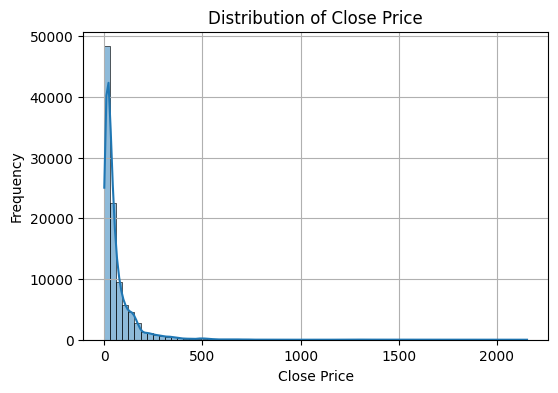

In [9]:
#Exploring distribution of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df_stocks['Close'], kde=True, bins=70)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The "Close" price data for the stocks, as depicted in the table and histogram, demonstrates a right-skewed distribution, with a mean closing price of 65.0, which is higher than the median of 33.0. This skewness is also evident in the histogram, where the frequency of stocks sharply decreases as the closing price increases. The high standard deviation of 118.0 relative to the mean indicates a wide dispersion of closing prices. Most stocks close at a lower price, with 25% of them closing at or below 15.0, but there are a few stocks with a much higher closing price, as shown by the long tail extending to a maximum of 2153.0. This suggests that while the bulk of the stocks in the dataset are modestly priced, there are outliers with significantly higher prices.

The relationship between the target variable "Close" and the numerical features in our dataset can be derived from the paiplots earlier (Exploring numerical fetaures). However, to highlight this relationship we plotted them again separately. We decided to not plot the relationship between the target variable and the categorical features, due to the nature of non ordinal categorical data. Nonetheless, the distribution of the target variable above the categorical values for each categorical feature is shown below in box plots.

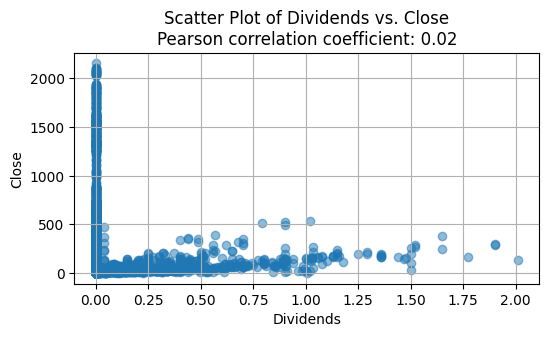

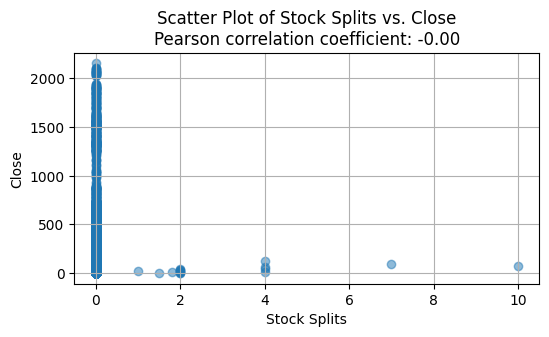

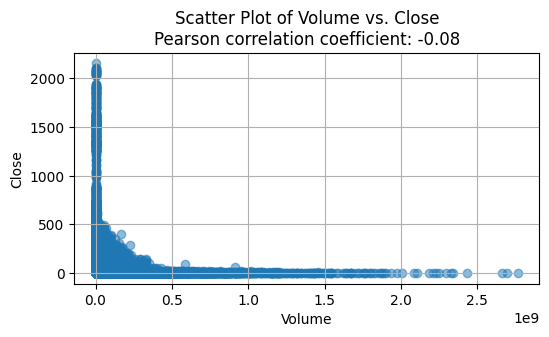

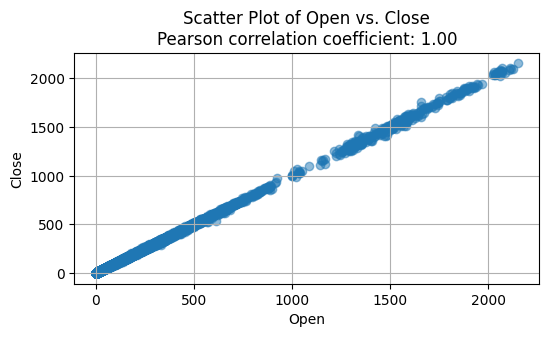

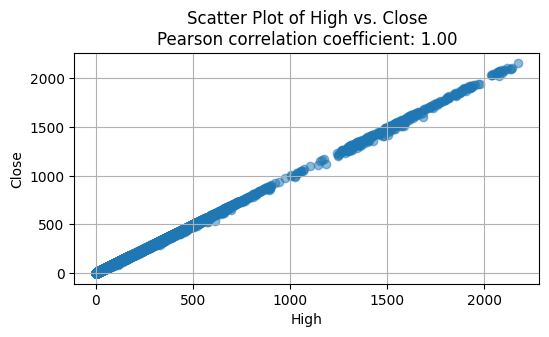

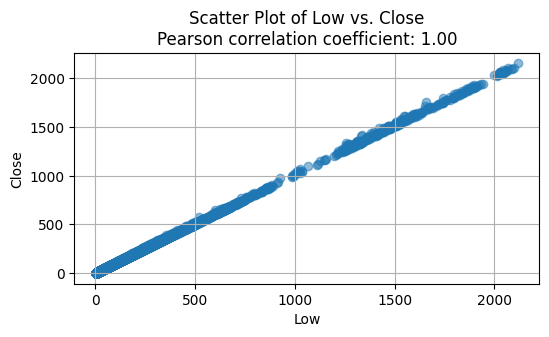

In [10]:
numerical_features_wo_close = ['Dividends', 'Stock Splits', 'Volume', 'Open', 'High', 'Low']

for feature in numerical_features_wo_close:
    # Exclude NaN values for both the feature and 'Close' columns
    valid_mask = ~np.isnan(df_stocks[feature]) & ~np.isnan(df_stocks['Close'])
    feature_values = df_stocks[feature][valid_mask]
    close_values = df_stocks['Close'][valid_mask]

    # Calculate the Pearson correlation coefficient, ignoring NaN values
    correlation_coefficient, _ = pearsonr(feature_values, close_values)

    plt.figure(figsize=(6, 3))
    plt.scatter(feature_values, close_values, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. Close\n' +
              f'Pearson correlation coefficient: {correlation_coefficient:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.grid(True)
    plt.show()


**Numerical Values:** The closing price of the stock is closely aligned with its opening, high, and low prices, reflecting the typical pattern that the end-of-day valuation often tracks other intra-day price metrics due to market consistency throughout the trading period. Conversely, the dividends and stock splits show a more scattered distribution with respect to the closing price, suggesting that these corporate actions do not directly influence the daily closing valuation. This outcome was expected because dividends and stock splits occur infrequently and affect only a subset of stocks at any given time, leading to a sparse and uneven distribution of these events in the dataset. Similarly, the volume of traded shares exhibits a dispersed association with the closing price, indicating that trading activity level, while indicative of market interest, does not necessarily dictate the closing price, potentially due to the influence of various other market factors.

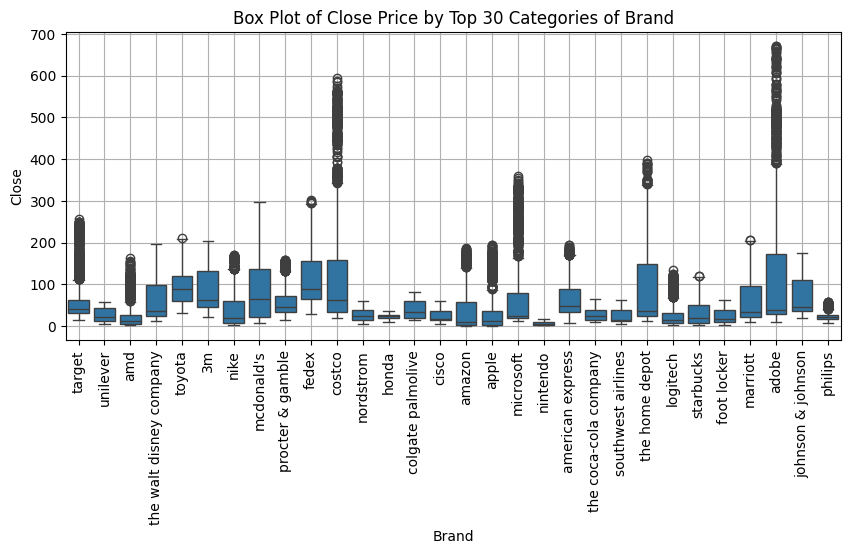

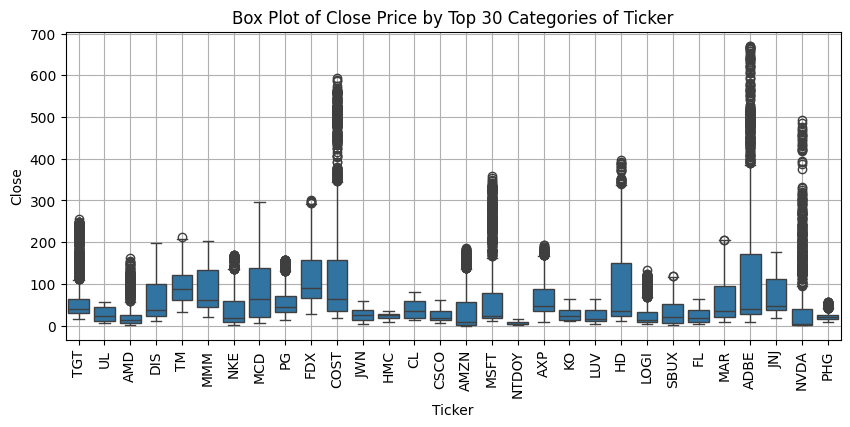

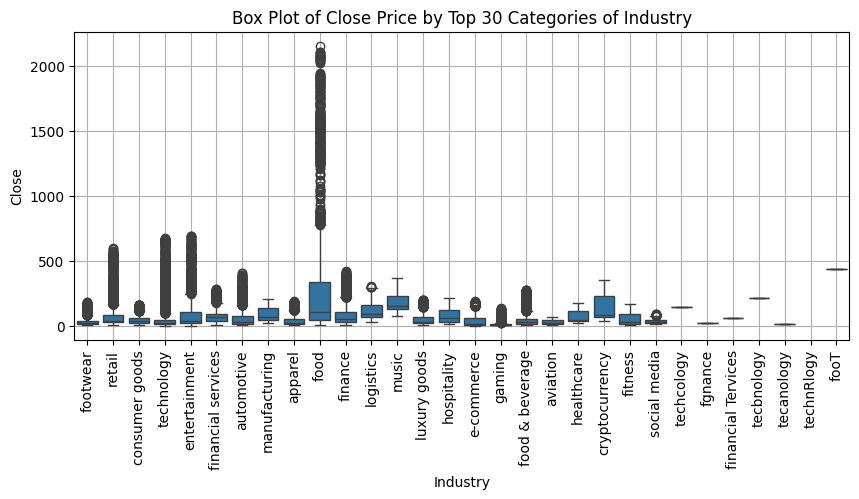

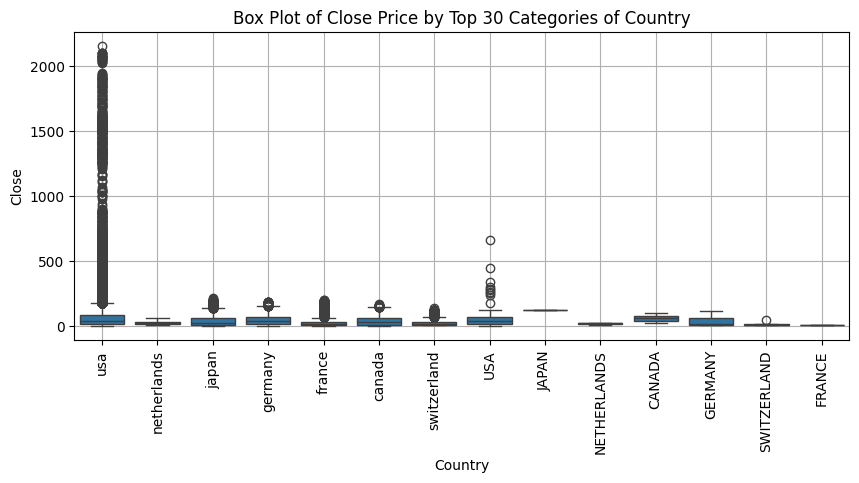

In [11]:
# Exploring the distribution of the target variable across its categorical features
N = 30

for feature in categorical_features:
    top_categories = df_stocks[feature].value_counts().nlargest(N).index

    filtered_df = df_stocks[df_stocks[feature].isin(top_categories)]

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=feature, y='Close', data=filtered_df)
    plt.title(f'Box Plot of Close Price by Top {N} Categories of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

**Categorical features:** The box plots illustrate the closing stock prices distributed across various categorical features—brands, tickers, industries, and countries—revealing distinct patterns. For brands and tickers, there's notable variability in median prices and several outliers, suggesting that specific companies significantly outperform others, potentially due to market capitalization or exceptional performance within their sectors. The industry plot indicates that while most sectors hover around a similar price median, technology exhibit high-value outliers, likely reflecting the higher growth prospects or dominant players within those sectors. Lastly, the country distribution highlights the USA as having higher price ranges and outliers, suggesting the presence of multinational corporations with large market valuations. These visuals align with the understanding that individual company performance, along with sectoral and economic influences, significantly impact stock prices, with certain companies and sectors consistently leading the market.

#### Transforming the dataset per column in order to have a cleaned dataset to work with.

 As we need to understand where we have data that needs to be cleaned, we decided to clean the data directly after analysis

##### **Target: Close Price**

Since we want to predict the closing price of a specific stock on a given day, it does not make sense to take datapoints into consideration, where target values are missing (both for the train and test set). Therefore, we decided to drop all 194 observations (total dataset), where the close price is missing. Given that the close price is our target, we dont need to analyze further, why specific prices are missing and can delete them directly.

In [12]:
print(f"Number of observations without a closing price: {df_stocks['Close'].isna().sum()}")

Number of observations without a closing price: 194


In [13]:
df_stocks.dropna(subset=['Close'], inplace=True)
print(f"Number of observations in modified set without a closing price: {df_stocks['Close'].isna().sum()}")

Number of observations in modified set without a closing price: 0


##### **Feature: Date**

First we look for lines with missing date values. Since the date is an integral part of the stock price prediction, we decided to delete all observation without date values. This is justified because of two reasons:

*   there are only 16 entries (0.016% of the dataset) and
*   we don't see any underlying pattern, why some of the observations have missing values, meaning that we cannot simply impute values for the missing data.

After that, we transform the given date column into various new columns, namely "year", "month", "day", "time" and "timezone" in order to avoid loss of information and to account for cyclicality.

After that we deleted the inital Date column and checked the distribution of the newly created columns. However, since we need the datetime format of the "Date" feature, we decided do delete it at the very end of our cleaning process.

In [14]:
missing_values = df_stocks["Date"].isna().sum()
print("We have", missing_values, "missing values in column Date")
df_stocks[df_stocks["Date"].isna()]

We have 16 missing values in column Date


,Date,Dividends,Stock Splits,Brand,Ticker,Industry,Country,Volume,Open,High,Low,Close
624,NaN,0.0,0.0,nvidia,NVDA,technology,usa,38822400.0,1.628431,1.672009,1.594027,1.610082
1755,NaN,0.0,0.0,pinterest,PINS,social media,usa,17571900.0,19.000000,19.750000,18.872000,19.520000
2840,NaN,0.0,0.0,nvidia,NVDA,technology,usa,36405600.0,96.124530,97.106818,95.518705,95.857765
7692,NaN,0.0,0.0,logitech,LOGI,technology,switzerland,262100.0,13.235219,13.365578,13.066521,13.120197
7756,NaN,0.0,0.0,unilever,UL,consumer goods,netherlands,2856200.0,11.813225,11.927158,11.783241,11.927158
9946,NaN,0.0,0.0,crocs,CROX,footwear,usa,846000.0,23.610001,24.379999,23.610001,24.270000
14254,NaN,0.0,0.0,crocs,CROX,footwear,usa,811300.0,36.560001,37.200001,36.110001,36.520000
29461,NaN,0.0,0.0,amd,AMD,technology,usa,73680200.0,45.779999,47.500000,45.400002,47.500000
55332,NaN,0.0,0.0,peloton,PTON,fitness,usa,9338500.0,9.120000,9.460000,8.880000,9.130000
64869,NaN,0.0,0.0,colgate palmolive,CL,consumer goods,usa,2102500.0,52.463773,52.479984,52.188247,52.455673


In [15]:
# Drop rows with missing values in the 'Date' column
df_stocks.dropna(subset=["Date"], inplace=True)

# Count missing values again after cleaning
missing_values_date = df_stocks["Date"].isna().sum()
print("We have", missing_values_date, "missing values in column Date left after cleaning")

df_stocks['UTC_Offset'] = df_stocks['Date'].str[-6:]
df_stocks["time"] = df_stocks['Date'].str[11:19]

df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], utc = True)

df_stocks['Year'] = df_stocks['Date'].dt.year.astype(int)
df_stocks['Month'] = df_stocks['Date'].dt.month.astype(int)
df_stocks['Day'] = df_stocks['Date'].dt.day.astype(int)

df_stocks

We have 0 missing values in column Date left after cleaning


,Date,Dividends,Stock Splits,Brand,Ticker,Industry,Country,Volume,Open,High,Low,Close,UTC_Offset,time,Year,Month,Day
0,2021-01-25 05:00:00+00:00,0.0,0.0,crocs,CROX,footwear,usa,1102500.0,73.180000,74.750000,71.050003,73.910004,-05:00,00:00:00,2021,1,25
1,2019-09-12 04:00:00+00:00,0.0,0.0,target,TGT,retail,usa,3185700.0,100.810594,101.077753,99.999911,100.359192,-04:00,00:00:00,2019,9,12
2,2015-12-29 05:00:00+00:00,0.0,0.0,unilever,UL,consumer goods,netherlands,1278700.0,33.785507,33.970634,33.700657,33.908924,-05:00,00:00:00,2015,12,29
3,2014-06-13 04:00:00+00:00,0.0,0.0,amd,AMD,technology,usa,17734600.0,4.360000,4.390000,4.240000,4.280000,-04:00,00:00:00,2014,6,13
4,2017-10-06 04:00:00+00:00,0.0,0.0,the walt disney company,DIS,entertainment,usa,4360200.0,96.426167,96.734885,95.837672,96.541939,-04:00,00:00:00,2017,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2004-06-18 04:00:00+00:00,0.0,0.0,fedex,FDX,logistics,usa,957800.0,66.332358,66.936849,65.991798,66.604805,-04:00,00:00:00,2004,6,18
99996,2022-06-24 04:00:00+00:00,0.0,0.0,hershey company,HSY,food & beverage,usa,1154300.0,213.073770,216.005978,212.311397,215.966888,-04:00,00:00:00,2022,6,24
99997,2017-09-06 04:00:00+00:00,0.0,0.0,unilever,UL,consumer goods,netherlands,1079900.0,47.701035,47.904677,47.546265,47.880238,-04:00,00:00:00,2017,9,6
99998,2021-06-04 04:00:00+00:00,0.0,0.0,amazon,AMZN,e-commerce,usa,44994000.0,160.600006,161.050003,159.940506,160.311005,-04:00,00:00:00,2021,6,4


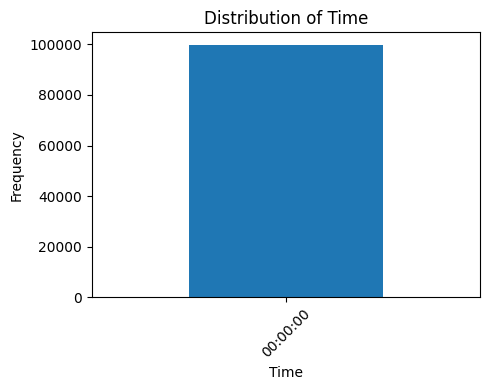

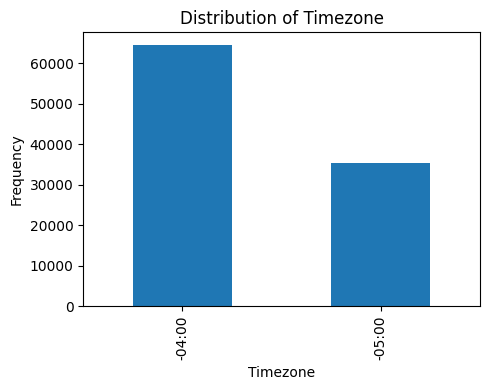

Text(0, 0.5, 'Frequency')

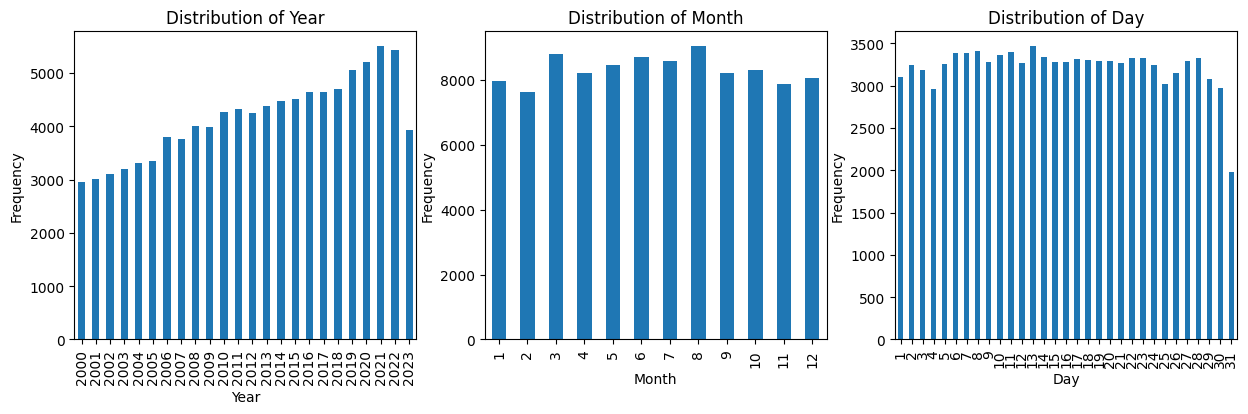

In [16]:
plt.figure(figsize=(5, 4))
df_stocks['time'].value_counts().plot(kind='bar')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
df_stocks['UTC_Offset'].value_counts().plot(kind='bar')
plt.title('Distribution of Timezone')
plt.xlabel('Timezone')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
df_stocks['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df_stocks['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df_stocks['Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

Since our dataset does not include any different values for "time", it does not provide any further insight. Therefore, we decided to drop this feature. However, we first decided to keep the categorical features for timezone, although we assume they won't have an significant impact on our prediction model.

Moreover, when analyzing the the distribution of "Year", "Month" and "Day", we see that for the latter two, they are mostly equally distributed, besides the 31st, which occurs less often, which makes sense, since only every second month has 31 days.
As already described before, the we see an increasing amount of observations as the years increase, except for 2023, which also makes sense since the dataset is as of 2023. However, one should have in mind that when training the model, it might be biased tomards recent events.

In [17]:
df_stocks.drop(columns=["time"], inplace=True)

##### **Features: Brand, Ticker, Country, Industry**

Since the Ticker, Country and Industry are assignable to the Brand value, we will use this column in order to fill the empty values in these rows. Afterwards we can drop the column "Brand", since otherwise we would have the same feature that is used twice in our regression model. (Ticker and Brand only have unique combinations)

In [18]:
mapping_df = df_stocks.drop_duplicates(subset=['Brand']).dropna(subset=['Ticker', 'Country', 'Industry'])

ticker_mapping = mapping_df.set_index('Brand')['Ticker'].to_dict()
country_mapping = mapping_df.set_index('Brand')['Country'].to_dict()
industry_mapping = mapping_df.set_index('Brand')['Industry'].to_dict()

df_stocks['Ticker'] = df_stocks['Brand'].map(ticker_mapping).fillna(df_stocks['Ticker'])
df_stocks['Country'] = df_stocks['Brand'].map(country_mapping).fillna(df_stocks['Country'])
df_stocks['Industry'] = df_stocks['Brand'].map(industry_mapping).fillna(df_stocks['Industry'])

#final check
missing_values_ticker = df_stocks["Ticker"].isna().sum()
print("We have", missing_values_ticker, "missing values in column Ticker left")
missing_values_country = df_stocks["Country"].isna().sum()
print("We have", missing_values_country, "missing values in column Country left")
missing_values_industry = df_stocks["Industry"].isna().sum()
print("We have", missing_values_industry, "missing values in column Industry left")

We have 0 missing values in column Ticker left
We have 0 missing values in column Country left
We have 0 missing values in column Industry left


In [19]:
df_stocks.drop(columns=["Brand"],inplace=True)

##### **Feature: Open**

In case of missing values, we will impute missing data with the following approach:
- Open: Replacing it with the closing price of the previous day, since timeperiod between two datapoints comparably short. This approach should not lead into data leakage since we will have all the historical data once we start to predict the future price of a stock, which is before the exchanges close and the opening price is already available.  

*First we are checking for the average time difference between two observations to justify our decision*

To do so, we first sort our observations based on "Ticker" and "Date", which we would also need for imputing later.

In [20]:
df_stocks = df_stocks.sort_values(by=['Ticker', 'Date'])

df_stocks['Time_Difference'] = df_stocks.groupby('Ticker')['Date'].diff()

average_time_difference = df_stocks.groupby('Ticker')['Time_Difference'].mean()

print("Average time difference per ticker:", average_time_difference, "\n" )


overall_average_time_difference = df_stocks['Time_Difference'].mean()

print("Overall Average Time Difference:", overall_average_time_difference)

df_stocks.drop(["Time_Difference"], axis=1, inplace=True)

Average time difference per ticker: Ticker
AAPL    4 days 03:27:39.415428845
ABNB    4 days 02:39:05.901639344
ADBE    4 days 01:18:53.114754098
ADDYY   4 days 01:46:46.189555125
AEO     4 days 05:57:29.852796859
                   ...           
UBSFY   4 days 01:41:12.608340147
UL      4 days 01:53:58.642789820
V       4 days 01:00:38.543897216
ZI      4 days 00:04:48.963210702
ZM      4 days 06:16:08.865435356
Name: Time_Difference, Length: 61, dtype: timedelta64[ns] 

Overall Average Time Difference: 4 days 01:36:06.555365039


As we can see from the analysis above, the average time between two observations is 4 days on average. Taking into account weekends, public holiday etc., it is a reasonable way to impute the data in that way. Recall, that the average time difference just with weekends would be 3 days.

In [21]:
print(f"Number of missing values for prices:\nOpen: {df_stocks['Open'].isnull().sum()}")

Number of missing values for prices:
Open: 803


Next, we are resetting the index of the dataset, in order to access it more easily.

In [22]:
df_stocks.reset_index(drop=True, inplace = True)
df_stocks

,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,High,Low,Close,UTC_Offset,Year,Month,Day
0,2000-01-03 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,535796800.0,0.794800,0.852586,0.770643,0.848323,-05:00,2000,1,3
1,2000-01-04 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,512377600.0,0.820377,0.838376,0.766854,0.776801,-05:00,2000,1,4
2,2000-01-05 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,778321600.0,0.786273,0.837902,0.780590,0.788168,-05:00,2000,1,5
3,2000-01-07 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,460734400.0,0.731329,0.765433,0.723751,0.754065,-05:00,2000,1,7
4,2000-01-11 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,441548800.0,0.727066,0.753118,0.685858,0.702910,-05:00,2000,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99785,2023-08-28 04:00:00+00:00,0.0,0.0,ZM,technology,usa,1841300.0,68.230003,68.555000,67.195000,67.570000,-04:00,2023,8,28
99786,2023-09-01 04:00:00+00:00,0.0,0.0,ZM,technology,usa,4024300.0,71.790001,72.415001,71.425003,71.720001,-04:00,2023,9,1
99787,2023-09-08 04:00:00+00:00,0.0,0.0,ZM,technology,usa,3885348.0,73.680000,73.800003,71.639999,72.059998,-04:00,2023,9,8
99788,2023-09-15 04:00:00+00:00,0.0,0.0,ZM,technology,usa,6238300.0,71.570000,72.449997,70.651001,71.110001,-04:00,2023,9,15


Now, we clean our data based on our chosen approach.

In [23]:
df_stocks['Open'] = df_stocks.groupby('Ticker')['Open'].fillna(df_stocks.groupby('Ticker')['Close'].shift())

/var/folders/dd/pwf2nnyn3ds8tgggtfghzwth0000gn/T/ipykernel_20079/3557784937.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_stocks['Open'] = df_stocks.groupby('Ticker')['Open'].fillna(df_stocks.groupby('Ticker')['Close'].shift())


And check, whether all missing data has been cleaned:

In [24]:
print(f"Number of missing values for open data:\nOpen: {df_stocks['Open'].isnull().sum()}")

Number of missing values for open data:
Open: 0


##### **Feature: High and Low**

Although these two features might be relevant for predicting the closing price, they won't be available during the time of prediction, as they always refer to the entire day. Therefore, we  need to entirely drop these two columns.

Besides that, we were also thinking about creating new feature(s) based on the "High" and "Low" Feature. Features we were thinking about were high and low prices with a time lag, meaning that we would create a new feature which has the values of the most recent observation. However, this wouldn't make much sense from a economic perspective, since it's unlikely that a historic High/Low price would explain the current Closing price. Moreover, the effect on the Close Price would most likely be driven by the magnitude.
Besides that, we also thought about computing the volatility, but here we could also only use the volatility with a time lag, which wouldn't make much sense as well, due to the beforementioned reasons.

In [25]:
df_stocks.drop(["High", "Low"], axis=1, inplace=True)

In [26]:
df_stocks

,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
0,2000-01-03 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,535796800.0,0.794800,0.848323,-05:00,2000,1,3
1,2000-01-04 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,512377600.0,0.820377,0.776801,-05:00,2000,1,4
2,2000-01-05 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,778321600.0,0.786273,0.788168,-05:00,2000,1,5
3,2000-01-07 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,460734400.0,0.731329,0.754065,-05:00,2000,1,7
4,2000-01-11 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,441548800.0,0.727066,0.702910,-05:00,2000,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99785,2023-08-28 04:00:00+00:00,0.0,0.0,ZM,technology,usa,1841300.0,68.230003,67.570000,-04:00,2023,8,28
99786,2023-09-01 04:00:00+00:00,0.0,0.0,ZM,technology,usa,4024300.0,71.790001,71.720001,-04:00,2023,9,1
99787,2023-09-08 04:00:00+00:00,0.0,0.0,ZM,technology,usa,3885348.0,73.680000,72.059998,-04:00,2023,9,8
99788,2023-09-15 04:00:00+00:00,0.0,0.0,ZM,technology,usa,6238300.0,71.570000,71.110001,-04:00,2023,9,15


##### **Feature: Volume**

There are 958 instances with a daily trading volume of zero and 852 with missing values. To verify the accuracy of the data, we first check if the opening and closing prices remain unchanged for those observations with a volume of 0. If they do, we assume this stock was not traded on that specific day, possibly due to public holidays, weekends, or other factors. In this case, we decided to drop the data points since they do not have any explanatory power.

For the NAN-Values we decided to use the average daily volume for the respective ticker.

In [27]:
missing_values_volume = df_stocks["Volume"].isna().sum()
print("We have", missing_values_volume, "missing values in column Volume")

We have 852 missing values in column Volume


In [28]:
zero_values = (df_stocks["Volume"] == 0).sum()
print("We have", zero_values, "values in column Volume with a volume of 0")

We have 958 values in column Volume with a volume of 0


In the following line of code, we are checking for which observations the close price does not change.

In [29]:
df_stocks[(df_stocks["Volume"] == 0) & ((df_stocks["Open"] - df_stocks["Close"]) == 0)]

,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
4519,2006-11-24 05:00:00+00:00,0.0,0.0,ADDYY,apparel,germany,0.0,19.564322,19.564322,-05:00,2006,11,24
4614,2007-11-28 05:00:00+00:00,0.0,0.0,ADDYY,apparel,germany,0.0,26.766769,26.766769,-05:00,2007,11,28
14406,2009-03-26 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,19.115532,19.115532,-04:00,2009,3,26
14420,2009-05-26 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,21.904518,21.904518,-04:00,2009,5,26
14427,2009-06-30 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,23.910088,23.910088,-04:00,2009,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94980,2016-09-12 04:00:00+00:00,0.0,0.0,UBSFY,gaming,france,0.0,8.010000,8.010000,-04:00,2016,9,12
94999,2016-12-08 05:00:00+00:00,0.0,0.0,UBSFY,gaming,france,0.0,6.700000,6.700000,-05:00,2016,12,8
95009,2017-02-02 05:00:00+00:00,0.0,0.0,UBSFY,gaming,france,0.0,6.600000,6.600000,-05:00,2017,2,2
95018,2017-03-30 04:00:00+00:00,0.0,0.0,UBSFY,gaming,france,0.0,8.360000,8.360000,-04:00,2017,3,30


In the dataframe above, we see that for 943 observations, the volume is zero, since the stock was not traded on that specific day. Since it would be useless to predict a share price for days, where the volume equals zero (meaning we cannot trade, we decided to delete these observations.

In [30]:
df_stocks.drop(df_stocks[(df_stocks["Volume"] == 0) & ((df_stocks["Open"] - df_stocks["Close"]) == 0)].index, inplace=True)

In [31]:
print(len(df_stocks[(df_stocks["Volume"] == 0.0)]))
df_stocks[(df_stocks["Volume"] == 0.0)]

15


,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
14490,2010-04-05 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,29.832762,29.832762,-04:00,2010,4,5
14496,2010-04-21 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,30.917021,30.917021,-04:00,2010,4,21
14651,2012-02-22 05:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,59.327087,59.327087,-05:00,2012,2,22
14690,2012-06-22 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,45.275612,45.275612,-04:00,2012,6,22
14730,2012-12-06 05:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,55.792274,55.792274,-05:00,2012,12,6
14791,2013-08-23 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,62.673862,62.673862,-04:00,2013,8,23
14792,2013-08-26 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,62.673862,62.673862,-04:00,2013,8,26
15042,2016-06-22 04:00:00+00:00,0.0,0.0,BAMXF,automotive,germany,0.0,57.183250,57.183250,-04:00,2016,6,22
56856,2006-06-02 04:00:00+00:00,0.0,0.0,LVMUY,luxury goods,france,0.0,12.651546,12.651546,-04:00,2006,6,2
56863,2006-07-07 04:00:00+00:00,0.0,0.0,LVMUY,luxury goods,france,0.0,13.097843,12.548059,-04:00,2006,7,7


Since we see, that for 15 rows, the Volume still equals zero, we decided to drop these observations, despite the difference between Open and Close Price not being excactly zero. However, looking at the first example, we know that this was an public holiday in Germany (Easter), and therefore it is reasonable to drop these observations.

Moreover, we also see that we only have these observations for companies from Germany and France.

In [32]:
df_stocks.drop(df_stocks[df_stocks["Volume"] == 0].index, inplace=True)

However, we still have observations with NAN Values in the volume column, so lets look at these first.

In [33]:
df_stocks[df_stocks["Volume"].isna()]

,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
89,2000-11-28 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,NaN,0.283248,0.273301,-05:00,2000,11,28
279,2003-04-21 04:00:00+00:00,0.0,0.0,AAPL,technology,usa,NaN,0.199012,0.199164,-04:00,2003,4,21
284,2003-04-28 04:00:00+00:00,0.0,0.0,AAPL,technology,usa,NaN,0.204317,0.210077,-04:00,2003,4,28
583,2006-08-31 04:00:00+00:00,0.0,0.0,AAPL,technology,usa,NaN,2.039537,2.056816,-04:00,2006,8,31
726,2008-04-09 04:00:00+00:00,0.0,0.0,AAPL,technology,usa,NaN,4.647463,4.590775,-04:00,2008,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98699,2019-03-06 05:00:00+00:00,0.0,0.0,V,finance,usa,NaN,143.592700,143.408356,-05:00,2019,3,6
98717,2019-04-26 04:00:00+00:00,0.0,0.0,V,finance,usa,NaN,156.457767,158.078033,-04:00,2019,4,26
98945,2021-09-30 04:00:00+00:00,0.0,0.0,V,finance,usa,NaN,224.174302,219.416580,-04:00,2021,9,30
99009,2022-07-06 04:00:00+00:00,0.0,0.0,V,finance,usa,NaN,198.052471,199.161560,-04:00,2022,7,6


In order to better understand how the NaN values are distributed, we are plotting some distribution charts

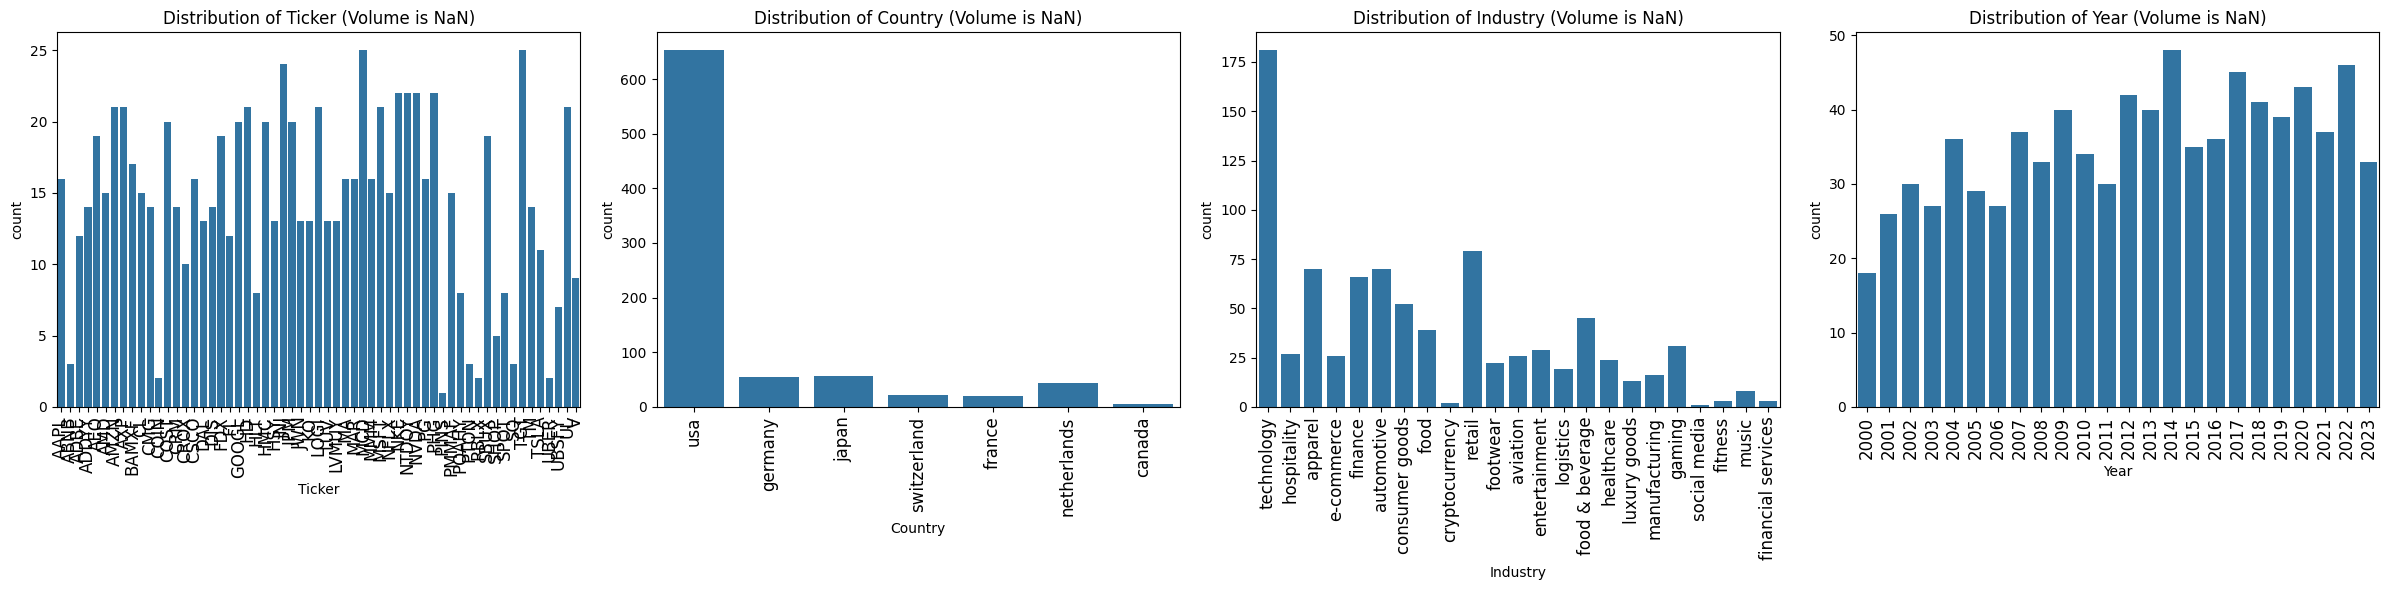

In [34]:
# Filter rows where 'Volume' is NaN
missing_volume_df = df_stocks[df_stocks["Volume"].isna()]

# Plot distributions for 'Ticker', 'Country', 'Industry', and 'Year'
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
sns.countplot(data=missing_volume_df, x='Ticker')
plt.title('Distribution of Ticker (Volume is NaN)')
plt.xticks(rotation=90, fontsize=12)

plt.subplot(1, 4, 2)
sns.countplot(data=missing_volume_df, x='Country')
plt.title('Distribution of Country (Volume is NaN)')
plt.xticks(rotation=90, fontsize=12)

plt.subplot(1, 4, 3)
sns.countplot(data=missing_volume_df, x='Industry')
plt.title('Distribution of Industry (Volume is NaN)')
plt.xticks(rotation=90, fontsize=12)

plt.subplot(1, 4, 4)
sns.countplot(data=missing_volume_df, x='Year')
plt.title('Distribution of Year (Volume is NaN)')
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()
plt.show()


We see that mostly American companies and tech companies have observations with NaN-Volumes in our dataset. This is not surprising, since the entire dataset is skewed in this way, as described above. Since the distribution of tickers and years seems fine, we decided to drop observations with NaN values for volume.

In [35]:
df_stocks.drop(df_stocks[df_stocks["Volume"].isna()].index, inplace=True)

In [36]:
print("Number of missing values for the volume column: ", df_stocks["Volume"].isna().sum())

Number of missing values for the volume column:  0


Now, we are once again resetting the index to have better access to the data.

In [37]:
df_stocks.reset_index(inplace=True, drop=True)
df_stocks

,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
0,2000-01-03 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,535796800.0,0.794800,0.848323,-05:00,2000,1,3
1,2000-01-04 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,512377600.0,0.820377,0.776801,-05:00,2000,1,4
2,2000-01-05 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,778321600.0,0.786273,0.788168,-05:00,2000,1,5
3,2000-01-07 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,460734400.0,0.731329,0.754065,-05:00,2000,1,7
4,2000-01-11 05:00:00+00:00,0.0,0.0,AAPL,technology,usa,441548800.0,0.727066,0.702910,-05:00,2000,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97975,2023-08-28 04:00:00+00:00,0.0,0.0,ZM,technology,usa,1841300.0,68.230003,67.570000,-04:00,2023,8,28
97976,2023-09-01 04:00:00+00:00,0.0,0.0,ZM,technology,usa,4024300.0,71.790001,71.720001,-04:00,2023,9,1
97977,2023-09-08 04:00:00+00:00,0.0,0.0,ZM,technology,usa,3885348.0,73.680000,72.059998,-04:00,2023,9,8
97978,2023-09-15 04:00:00+00:00,0.0,0.0,ZM,technology,usa,6238300.0,71.570000,71.110001,-04:00,2023,9,15


##### **Feature: Stock Splits**

Stock splits usually correlate with larger price differences between trading days. Therefore, we will calculate the price differences between trading days and we will check whether they have been significant (>20%). This is the case for four data instances. For those instances we manually checked online whether there has been a stock split. As this has not been the case we set all missing stock split data to 0. (This could also be done within the Pipeline mode is by far 0), but we wanted to showcase our reasoning behind this approach. Also this approach should not lead to data leakage, since stocksplits are comparably rare.

In [38]:
df_stocks["Stock Splits"].isna().sum()
df_stocks["Price_dif_percent"] =  ((df_stocks.groupby('Ticker')['Open'].shift(-1) - df_stocks['Close']) / df_stocks.groupby('Ticker')['Close'].shift(1))

In [39]:
df_stocks[df_stocks["Stock Splits"].isna()]["Price_dif_percent"]

significant_changes = df_stocks[(df_stocks["Stock Splits"].isna()) & (abs(df_stocks["Price_dif_percent"]) > 0.20)]

significant_changes


,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day,Price_dif_percent
14284,2009-04-01 04:00:00+00:00,0.0,NaN,BAMXF,automotive,germany,9200.0,18.394780,19.021519,-04:00,2009,4,1,0.217239
59833,2006-03-31 05:00:00+00:00,0.0,NaN,MAR,hospitality,usa,2023996.0,27.088738,26.826729,-05:00,2006,3,31,-0.636489
60274,2010-12-29 05:00:00+00:00,0.0,NaN,MAR,hospitality,usa,1202644.0,34.358731,34.260258,-05:00,2010,12,29,-0.620031
60621,2014-05-29 04:00:00+00:00,0.0,NaN,MAR,hospitality,usa,9867100.0,30.327214,30.312304,-04:00,2014,5,29,0.456007


In this specific case, we checked stock splits manually online, since no indicators for stock splits are available we decided to set all stock split NaN as 0.

In [40]:
df_stocks["Stock Splits"].fillna(0, inplace = True)
df_stocks.drop(columns=["Price_dif_percent"], inplace=True)

/var/folders/dd/pwf2nnyn3ds8tgggtfghzwth0000gn/T/ipykernel_20079/2831012693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stocks["Stock Splits"].fillna(0, inplace = True)


In [41]:
missing_values_stocksplits = df_stocks["Stock Splits"].isna().sum()
print("We have", missing_values_stocksplits, "missing values in column Stock Splits left")

We have 0 missing values in column Stock Splits left


In [42]:
print(df_stocks.columns)


Index(['Date', 'Dividends', 'Stock Splits', 'Ticker', 'Industry', 'Country',
       'Volume', 'Open', 'Close', 'UTC_Offset', 'Year', 'Month', 'Day'],
      dtype='object')


### Duplicates

In the following lines of Code, we are checking for duplicates and in order to prevent our model to learn from repeated data.

In [43]:
# 1. Checking for exact duplicates
duplicate_exact = df_stocks[df_stocks.duplicated()]
print(f"Number of exact duplicates found: {duplicate_exact.shape[0]}")

if duplicate_exact.shape[0] > 0:
    # Dropping found duplicates
    df_stocks.drop_duplicates(keep='first', inplace=True)
    print("Exact duplicates were erased.\n\n")
else:
    print("No exact duplicates found.\n\n")

# 2. Checking for subset duplicates based on year, month, day, and ticker
check = ['Year', 'Month', 'Day', 'Ticker']

duplicate_rows = df_stocks[df_stocks.duplicated(keep=False, subset=check)]
print(f'Within the dataframe, there are {len(duplicate_rows)} duplicates')
print('The following rows are marked as duplicates:')
display(duplicate_rows)

# Dropping found duplicates
df_stocks.drop_duplicates(subset=check, keep='first', inplace=True)

# Checking for remaining duplicates
adjusted_duplicates = df_stocks[df_stocks.duplicated(subset=check, keep=False)]
print(f'After dropping, {len(adjusted_duplicates)} duplicates were found.')

# Checking remaining number of rows
print(f'After removing duplicates, {df_stocks.shape[0]} datapoints remain')

Number of exact duplicates found: 0
No exact duplicates found.


Within the dataframe, there are 201 duplicates
The following rows are marked as duplicates:


,Date,Dividends,Stock Splits,Ticker,Industry,Country,Volume,Open,Close,UTC_Offset,Year,Month,Day
10092,2023-09-08 04:00:00+00:00,0.0,0.0,AMD,technology,usa,46271558.0,107.019997,106.089996,-04:00,2023,9,8
10093,2023-09-08 04:00:00+00:00,0.0,0.0,AMD,technology,usa,46232000.0,107.019997,106.089996,-04:00,2023,9,8
10095,2023-09-13 04:00:00+00:00,0.0,0.0,AMD,technology,usa,44702300.0,105.099998,107.709999,-04:00,2023,9,13
10096,2023-09-13 04:00:00+00:00,0.0,0.0,AMD,technology,usa,44651300.0,105.099998,107.709999,-04:00,2023,9,13
10097,2023-09-15 04:00:00+00:00,0.0,0.0,AMD,technology,usa,71017600.0,106.070000,101.489998,-04:00,2023,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92378,2023-09-15 04:00:00+00:00,0.0,0.0,TSLA,automotive,usa,133692313.0,277.549988,274.390015,-04:00,2023,9,15
92796,2023-09-13 04:00:00+00:00,0.0,0.0,UBER,technology,usa,12691800.0,47.509998,48.160000,-04:00,2023,9,13
92797,2023-09-13 04:00:00+00:00,0.0,0.0,UBER,technology,usa,12684000.0,47.509998,48.160000,-04:00,2023,9,13
92798,2023-09-15 04:00:00+00:00,0.0,0.0,UBER,technology,usa,16125700.0,48.189999,47.520000,-04:00,2023,9,15


After dropping, 0 duplicates were found.
After removing duplicates, 97879 datapoints remain


Why did we remove duplicates?

The code identifies and removes exact and subset duplicates in the df_stocks DataFrame to ensure data integrity. By eliminating these redundant data points, we reduce potential biases and inconsistencies that could adversely affect the performance of our machine learning models. This cleaning step ensures that the models will analyze unique, accurate records, leading to more reliable insights and predictions when we later apply them to the dataset.

Technically:

The code begins by identifying and removing exact duplicates within the df_stocks DataFrame. If any are found, they are removed, otherwise, a message is printed indicating no duplicates were detected. Next, it checks for duplicates based on a subset of columns (Year, Month, Day, and Ticker) to identify records with the same stock ticker on the same day. Duplicate rows are displayed and then dropped, keeping only the first occurrence. A final check ensures all subset duplicates have been removed, and the remaining number of rows is printed.

### Outlier Detection:
In order to delete anomalies, we checked for outliers, with the following code:

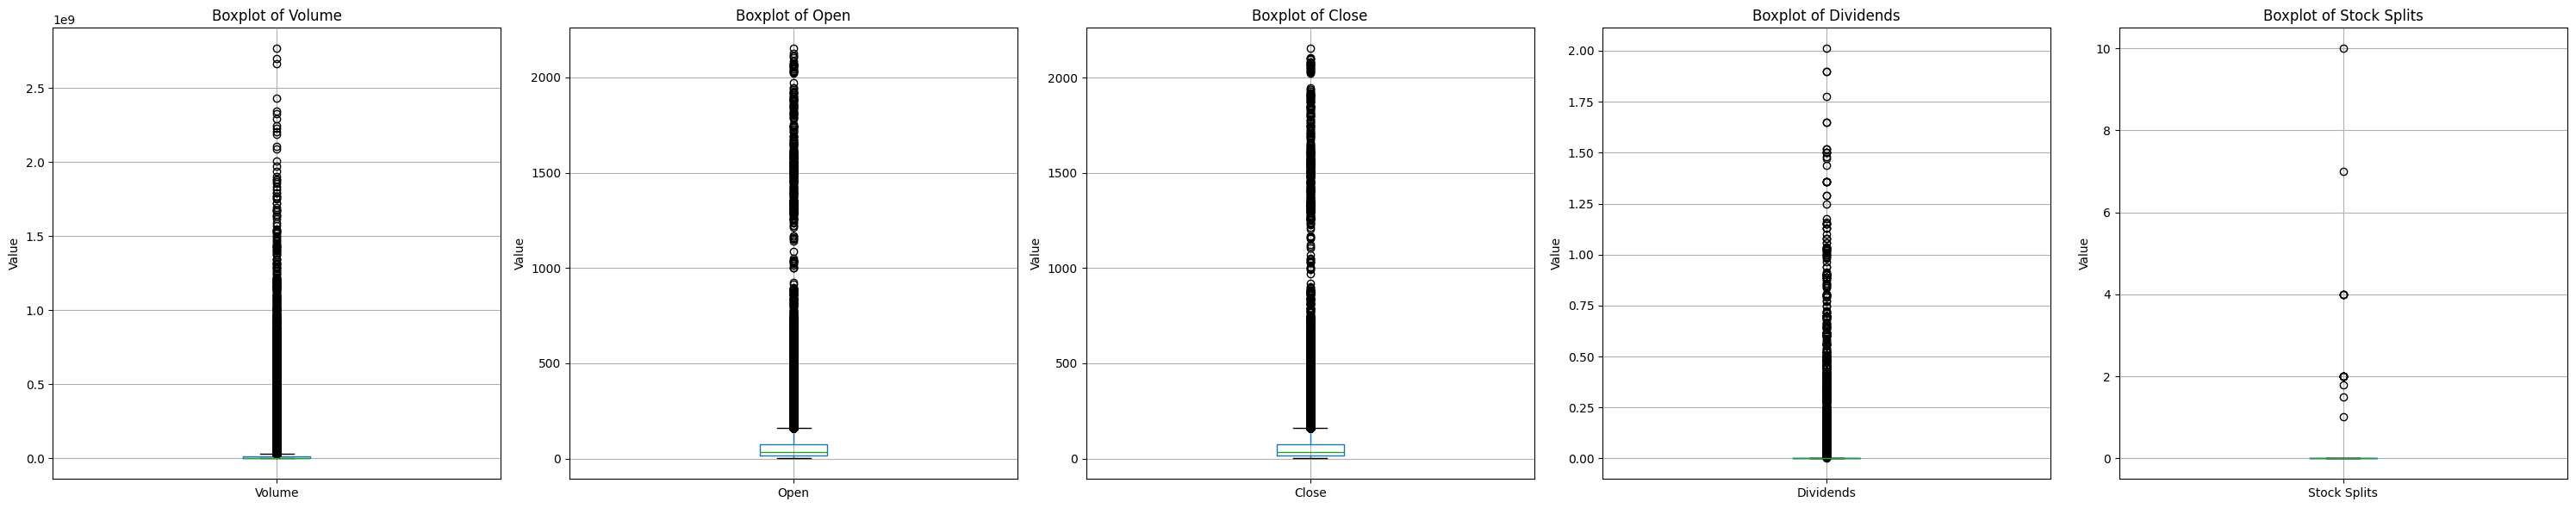

       Variable  IQR Outliers Count  Z-Score +/-3 Outliers Count  \
0        Volume               13736                         1348   
1          Open                8320                         1374   
2         Close                8337                         1366   
3     Dividends                 889                            0   
4  Stock Splits                  17                           17   

   Z-Score +/-2 Outliers Count  
0                         1996  
1                         2731  
2                         2740  
3                            0  
4                           17  
       Variable  NaN Count             Zero Count  Negative Count
0        Volume          0                      0               0
1          Open          0                      0               0
2         Close          0                      0               0
3     Dividends         58  Not checked -> normal               0
4  Stock Splits          0  Not checked -> normal              

In [44]:
def detect_outliers_iqr(df, column):
    """Identify outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def detect_outliers_zscore(df, column, threshold=3):
    """Identify outliers using the Z-Score method."""
    z_scores = zscore(df[column])
    return df[(z_scores < -threshold) | (z_scores > threshold)]

def plot_data(df, column):
    """Visualize the data distribution and potential outliers using boxplots."""
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Example dataframe setup
# df_stocks = pd.read_csv("path_to_your_data.csv")

variables = ['Volume', 'Open', 'Close', 'Dividends', 'Stock Splits']
num_vars = len(variables)

fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(num_vars * 6, 6))
for i, var in enumerate(variables):
    df_stocks.boxplot(column=[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xticklabels([var])
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

outliers_summary = []

for var in variables:
    iqr_outliers = detect_outliers_iqr(df_stocks, var)
    zscore_outliers_3 = detect_outliers_zscore(df_stocks, var, 3)
    zscore_outliers_2 = detect_outliers_zscore(df_stocks, var, 2)

    outliers_summary.append({
        'Variable': var,
        'IQR Outliers Count': len(iqr_outliers),
        'Z-Score +/-3 Outliers Count': len(zscore_outliers_3),
        'Z-Score +/-2 Outliers Count': len(zscore_outliers_2)
    })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df)

data_quality_summary = {'Variable': [], 'NaN Count': [], 'Zero Count': [], 'Negative Count': []}

for var in variables:
    nan_count = df_stocks[var].isna().sum()
    zero_count = df_stocks[var].eq(0).sum() if var not in ['Dividends', 'Stock Splits'] else "Not checked -> normal"
    negative_count = (df_stocks[var] < 0).sum()

    data_quality_summary['Variable'].append(var)
    data_quality_summary['NaN Count'].append(nan_count)
    data_quality_summary['Zero Count'].append(zero_count)
    data_quality_summary['Negative Count'].append(negative_count)

data_quality_df = pd.DataFrame(data_quality_summary)
print(data_quality_df)


Why did we detect and analyze outliers?

Outliers can skew statistical analyses, distort model performance, and lead to incorrect conclusions. By identifying and analyzing outliers, we aim to enhance data quality and ensure the robustness of our machine learning models. Understanding these anomalies allows us to decide whether to remove or adjust them, which in turn improves the accuracy of our predictions and insights.

Technically:

The analysis of the financial dataset reveals a substantial number of outliers across key metrics like Volume, Open, and Close. Identified primarily using the Interquartile Range (IQR) method, these outliers suggest skewed distributions often linked with significant market activities or anomalies. For Dividends and Stock Splits, the outliers are less frequent, reflecting occasional exceptional payments and the rarity of stock splits.

To further understand the data's behavior, two Z-score thresholds were applied: ±3 and ±2. The ±3 Z-score typically covers about 99.7% of data under a normal distribution, highlighting only the most extreme deviations. However, some outliers are still noted at this level, particularly for Volume and less significantly for price variables. By introducing a ±2 Z-score threshold, a broader range of potential outliers was captured. This adjustment was crucial given the non-normal distribution of the dataset, enabling identification of less extreme but impactful deviations.

Despite the popularity of these analytical tools, the results must be analyzed with caution. For Z-scores to provide significant insights, the data must approximately follow a normal distribution. However, financial datasets often exhibit skewness and heavy tails, which can affect Z-score-based findings. Therefore, the Z-score results here provide only marginal insights and must be interpreted alongside other methods, such as the IQR analysis. This comprehensive detection approach underscores the importance of nuanced analysis in financial data handling, helping to identify critical market events and informing strategic decision-making and model training approaches.

Dropdown(description='Main Ticker:', options=('AAPL', 'ABNB', 'ADBE', 'ADDYY', 'AEO', 'AMD', 'AMZN', 'AXP', 'B…

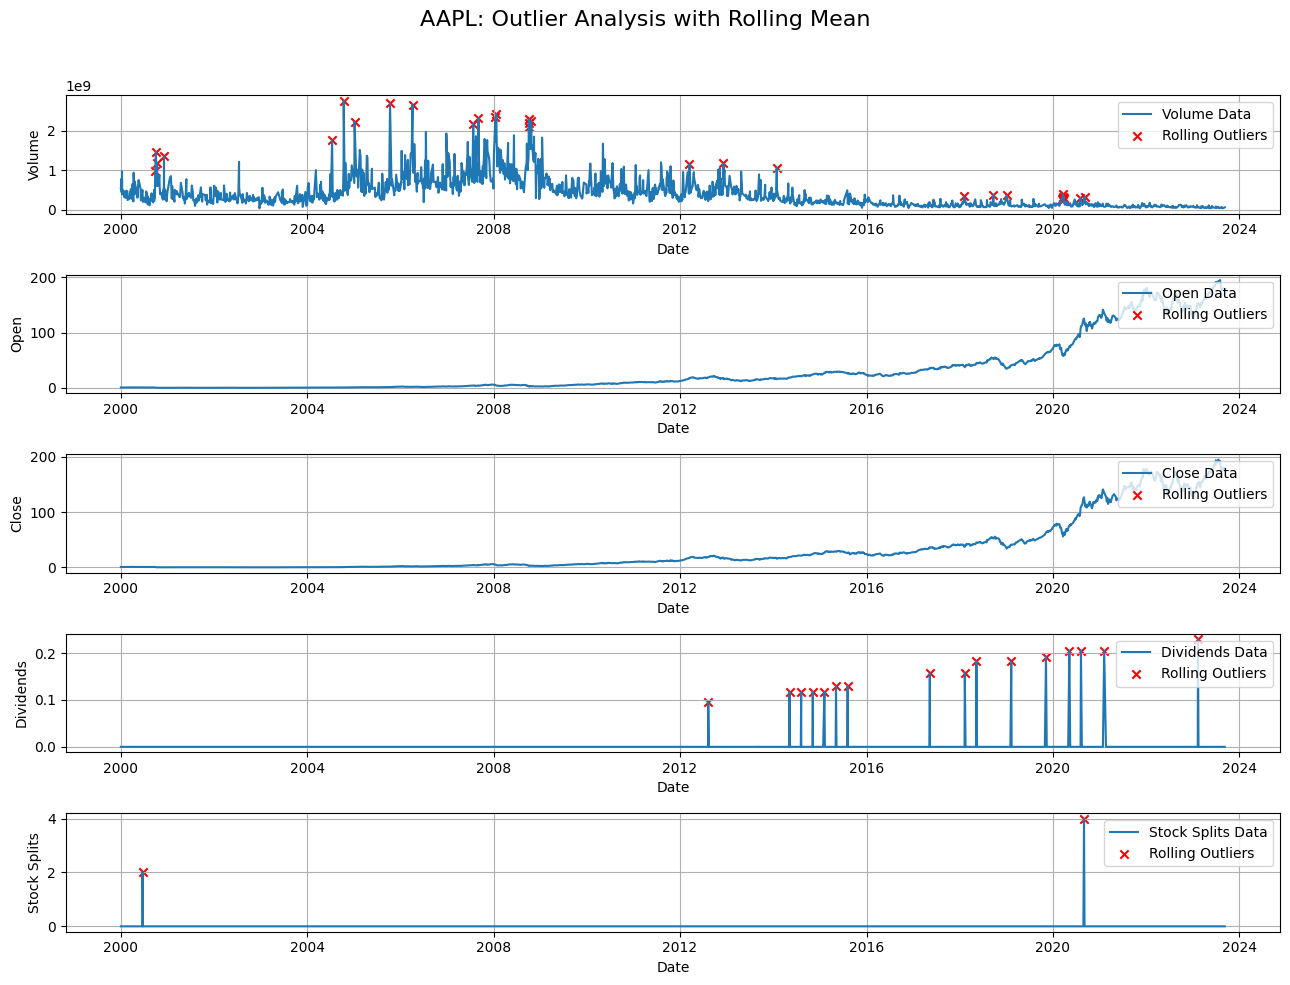

In [45]:
#Additional outlier check per ticker (assumes 'Ticker' column exists in df_stocks)
#Detect outliers using a rolling mean over a 504-day window (2 years)

#pip install ipywidgets ipympl

# Combine Year, Month, and Day columns to a datetime-like string
def combine_date_columns(df):
    return pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Detect outliers using a rolling mean over a 504-day window (2 years)
def detect_outliers_rolling(data, column, window=504, threshold=3):
    rolling_mean = data[column].rolling(window, min_periods=1, center=True).mean()
    rolling_std = data[column].rolling(window, min_periods=1, center=True).std()

    lower_bound = rolling_mean - threshold * rolling_std
    upper_bound = rolling_mean + threshold * rolling_std

    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Function to visualize outliers for a specific ticker and all variables using rolling detection
def plot_outliers_for_ticker_rolling(ticker, df, variables):
    ticker_data = df[df['Ticker'] == ticker]

    fig, axes = plt.subplots(len(variables), 1, figsize=(13, 2 * len(variables)))
    fig.suptitle(f"{ticker}: Outlier Analysis with Rolling Mean", fontsize=16)

    for i, var in enumerate(variables):
        ticker_outliers_rolling = detect_outliers_rolling(ticker_data, var)

        # Plot data with rolling mean outliers highlighted
        axes[i].plot(ticker_data['Date'], ticker_data[var], label=f"{var} Data")
        axes[i].scatter(ticker_outliers_rolling['Date'], ticker_outliers_rolling[var], color='red', label="Rolling Outliers", marker='x')

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(var)
        axes[i].legend(loc='upper right')
        axes[i].grid(True)

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Interactive investigation function with rolling outlier detection
def investigate_outliers_rolling_interactive(df, variables):
    if 'Ticker' not in df.columns:
        print("No 'Ticker' column found in the dataframe.")
        return

    df['Date'] = combine_date_columns(df)
    tickers = df['Ticker'].unique()

    # Dropdown widget for selecting the ticker
    ticker_dropdown = widgets.Dropdown(
        options=tickers,
        description='Main Ticker:',
        value=tickers[0],
    )

    def on_ticker_change(change):
        clear_output(wait=True)
        display(ticker_dropdown)
        plot_outliers_for_ticker_rolling(ticker_dropdown.value, df, variables)

    ticker_dropdown.observe(on_ticker_change, names='value')

    display(ticker_dropdown)

    # Initial plot
    plot_outliers_for_ticker_rolling(ticker_dropdown.value, df, variables)

# List of numerical variables to investigate
variables = ['Volume', 'Open', 'Close', 'Dividends', 'Stock Splits']

# Call the interactive investigation function
investigate_outliers_rolling_interactive(df_stocks, variables)


Why did we detect and analyze outliers with rolling mean analysis?

Analyzing outliers using rolling mean analysis provides insights into individual stock behavior over time and highlights significant deviations from typical market activity. By manually evaluating outliers for all (63) stocks, we aim to identify and understand anomalies that could skew our machine learning models. This enhances data quality and ensures accurate predictions and insights. We did so, as real market activity provides a lot of "real" outliers that would be deleted if measurements such as IQR would be executed right away.

Technically:

The rolling mean analysis involves detecting outliers for each stock individually across key metrics like Volume, Open, Close, Dividends, and Stock Splits. We chose a rolling mean window of 504 days (approximately two years) because it smooths out short-term fluctuations and identifies more meaningful long-term deviations. This timeframe is crucial, as a longer window resulted in too many data points being classified as outliers due to the general upward trend of many stocks.

The analysis uses a rolling mean and standard deviation to establish a dynamic benchmark. Anomalies are flagged if data points fall outside a threshold of ±3 standard deviations from the rolling mean. The plot_outliers_for_ticker_rolling function generates plots for each stock individually, highlighting detected outliers in red for manual inspection.

By manually evaluating each stock's outliers using the 504-day rolling mean, we can recognize critical market events and unusual trading activities, improving machine learning model training and strategic decision-making.

After looking at all (63) individual stocks no further outliers were deleted as all spikes were within realistic market spikes, leaving us with a cleaned dataset and hence allowing us to continue with the analyzes and modeling.

-> Since now, all cleaning steps are done, we still need to drop the remaining "Date" column as described above in the section for 'Date'.

In [46]:
df_stocks.drop(columns = "Date", inplace = True)

#### Splitting the data set

We will split our data set into a train, validation and test set with the ratio 60:30:10 and clean the last features ("Dividends") separately for each set, as we want to avoid data leakage if the training data values are used to impute values for the validation and test set.
But first we are once again sorting our dataset to make sure it can be trained correctly and then splitting it into X and y datasets.

In [47]:
df_stocks.sort_values(by = ["Year", "Month", "Day"], ascending = True, inplace = True)

X = df_stocks.drop(columns = "Close")
y = df_stocks["Close"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle=False)

print(f'Size of training set: {X_train.shape[0]}, size of validation set: {X_val.shape[0]}, size of test set: {X_test.shape[0]}')

Size of training set: 66068, size of validation set: 22023, size of test set: 9788


To check, whether there is no overlap between the three sets, we are printing the first and the last date within each set.

In [49]:
first_date_train = f"{X_train['Year'].iloc[0]}-{X_train['Month'].iloc[0]}-{X_train['Day'].iloc[0]}"
last_date_train = f"{X_train['Year'].iloc[-1]}-{X_train['Month'].iloc[-1]}-{X_train['Day'].iloc[-1]}"

first_date_val = f"{X_val['Year'].iloc[0]}-{X_val['Month'].iloc[0]}-{X_val['Day'].iloc[0]}"
last_date_val = f"{X_val['Year'].iloc[-1]}-{X_val['Month'].iloc[-1]}-{X_val['Day'].iloc[-1]}"

first_date_test = f"{X_test['Year'].iloc[0]}-{X_test['Month'].iloc[0]}-{X_test['Day'].iloc[0]}"
last_date_test = f"{X_test['Year'].iloc[-1]}-{X_test['Month'].iloc[-1]}-{X_test['Day'].iloc[-1]}"

print("Training set:")
print("First date:", first_date_train)
print("Last date:", last_date_train)

print("\nValidation set:")
print("First date:", first_date_val)
print("Last date:", last_date_val)

print("\nTest set:")
print("First date:", first_date_test)
print("Last date:", last_date_test)

Training set:
First date: 2000-1-3
Last date: 2017-6-12

Validation set:
First date: 2017-6-13
Last date: 2021-11-18

Test set:
First date: 2021-11-18
Last date: 2023-9-20


#### Final Dataset Overview

In [50]:
#Checking number of data instances in the modified dataset
modified_dataset_length = len(df_stocks)
print("The modified dataset has", modified_dataset_length, "data instances")

The modified dataset has 97879 data instances


In [51]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97879 entries, 0 to 97299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dividends     97821 non-null  float64
 1   Stock Splits  97879 non-null  float64
 2   Ticker        97879 non-null  object 
 3   Industry      97879 non-null  object 
 4   Country       97879 non-null  object 
 5   Volume        97879 non-null  float64
 6   Open          97879 non-null  float64
 7   Close         97879 non-null  float64
 8   UTC_Offset    97879 non-null  object 
 9   Year          97879 non-null  int64  
 10  Month         97879 non-null  int64  
 11  Day           97879 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 9.7+ MB


We can see that in our modifed dataset, we only have 12 features left, of which 8 are numerical now and 4 categorical. Also we now have only 97.879 data instances due to our preceding data transformation left. This makes up about 98% of our original dataset.

### **Summarized Exploration of our dataset and planned transformation**

In [52]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97879 entries, 0 to 97299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dividends     97821 non-null  float64
 1   Stock Splits  97879 non-null  float64
 2   Ticker        97879 non-null  object 
 3   Industry      97879 non-null  object 
 4   Country       97879 non-null  object 
 5   Volume        97879 non-null  float64
 6   Open          97879 non-null  float64
 7   Close         97879 non-null  float64
 8   UTC_Offset    97879 non-null  object 
 9   Year          97879 non-null  int64  
 10  Month         97879 non-null  int64  
 11  Day           97879 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 9.7+ MB


- **How many data instances do you have?**
  - The original dataset has 100.000 data instances.
  - After transforming our features, we have 97.879 left (approx. 98%)

- **Do you have duplicates?**
  - We don't have excact duplicates in sense that all features within observations have the same values. However, we have 201 observations with (slightly) different values for the same day and same ticker - these values were deleted accordingly.
    
- **How many features? What type are they?**
  - Original: We have 12 features, of which 7 are numerical and 5 categorical.
  - Modified: We can see that in our modifed dataset, we have 12 features left, of which 8 are numerical now and 4 categorical.
    
- **If they are categorical, what categories they have, what is their frequency?**
  - For a List of all categories and their respective frequencies, output number 4 can be oberserved. It should be noted, that the data exploration happened before any transformation of the features and therefore are not 100% reliable. For instance, the frequency of a value as well as the total number of values in the feature "Ticker" are compromised, since misspellings and different capitalization led to the accounting of the same value as different ones. However, since the number outliers is insignificant a decent overview of the dataset and features could still be explored and insights for further feature transformation steps could be derived.
    
- **If they are numerical, what is their distribution?**
  - For a List of all categories and their respective frequencies, output number 5 can be oberserved. Again, it should be noted, that any exploration is done before the transformation and cleaning of data, so interpretation should be made under caution. Additionally, we showcased the relationship between the numerical variables with each other. For further insight of the respective graphs, refer to output of line 5.
    
- **What is the distribution of the target variable?**
  - Our target variable is the Feature "Close", which would mean predicting the closing price of a company. The distribution of the stock's closing prices is seen to be right-skewed, meaning there's a higher occurrence of lower closing prices and fewer instances of higher prices. The bulk of the data points are concentrated on the lower end of the price spectrum, which can be seen on the median of 33, the 75-percentile of 73 and the mean of 66, compared to a maximum value of 2153 (chipotle).

- **If you have a target, you can also check the relationship between the target and the variables.**
  - The closing price of the stock is closely aligned with its opening, high, and low prices, reflecting the typical pattern that the end-of-day valuation often tracks other intra-day price metrics due to market consistency throughout the trading period. Conversely, the dividends and stock splits show a more scattered distribution with respect to the closing price, suggesting that these corporate actions do not directly influence the daily closing valuation. Similarly, the volume of traded shares exhibits a dispersed association with the closing price, indicating that trading activity level, while indicative of market interest, does not necessarily dictate the closing price, potentially due to the influence of various other market factors. The correlationscoefficient as well as the plotted graphs of the relationship between the target variable and the numerical features are seen in code line number 9, the distribution of the target variable across the categorical values per categorical feature is seen in code line number 10.

- **Do you have missing data? If yes, how are you going to handle it?** We have missing data in our dataset. The way of handling this data is differing for each feature and is documented in the table below
- **Can you use the features in their original form, or do you need to alter them in some way?** Some features could be used in their original form, some had to be adjusted, altered or even dropped. For further references plese refer to the table below.
  
- **What have you learned about your data? Is there anything that can help you in feature engineering or modeling?** In our analysis, we gained insights from data plotting, guiding our data transformation efforts. Detailed in the "Data Transformation" section, we adjusted each feature ranging from filling in missing data and mapping to changing  the data type. We learned about our features which steps could now be usefull for the next step "modeling". The categorical features for example need to be encoded, some have to be scaled or normalized. Please refer to the next chapter "Feature Engineerin and Modeling" in order to see what steps we used for our features.


![Screenshot%202024-04-03%20at%2011.35.13.png](attachment:Screenshot%202024-04-03%20at%2011.35.13.png)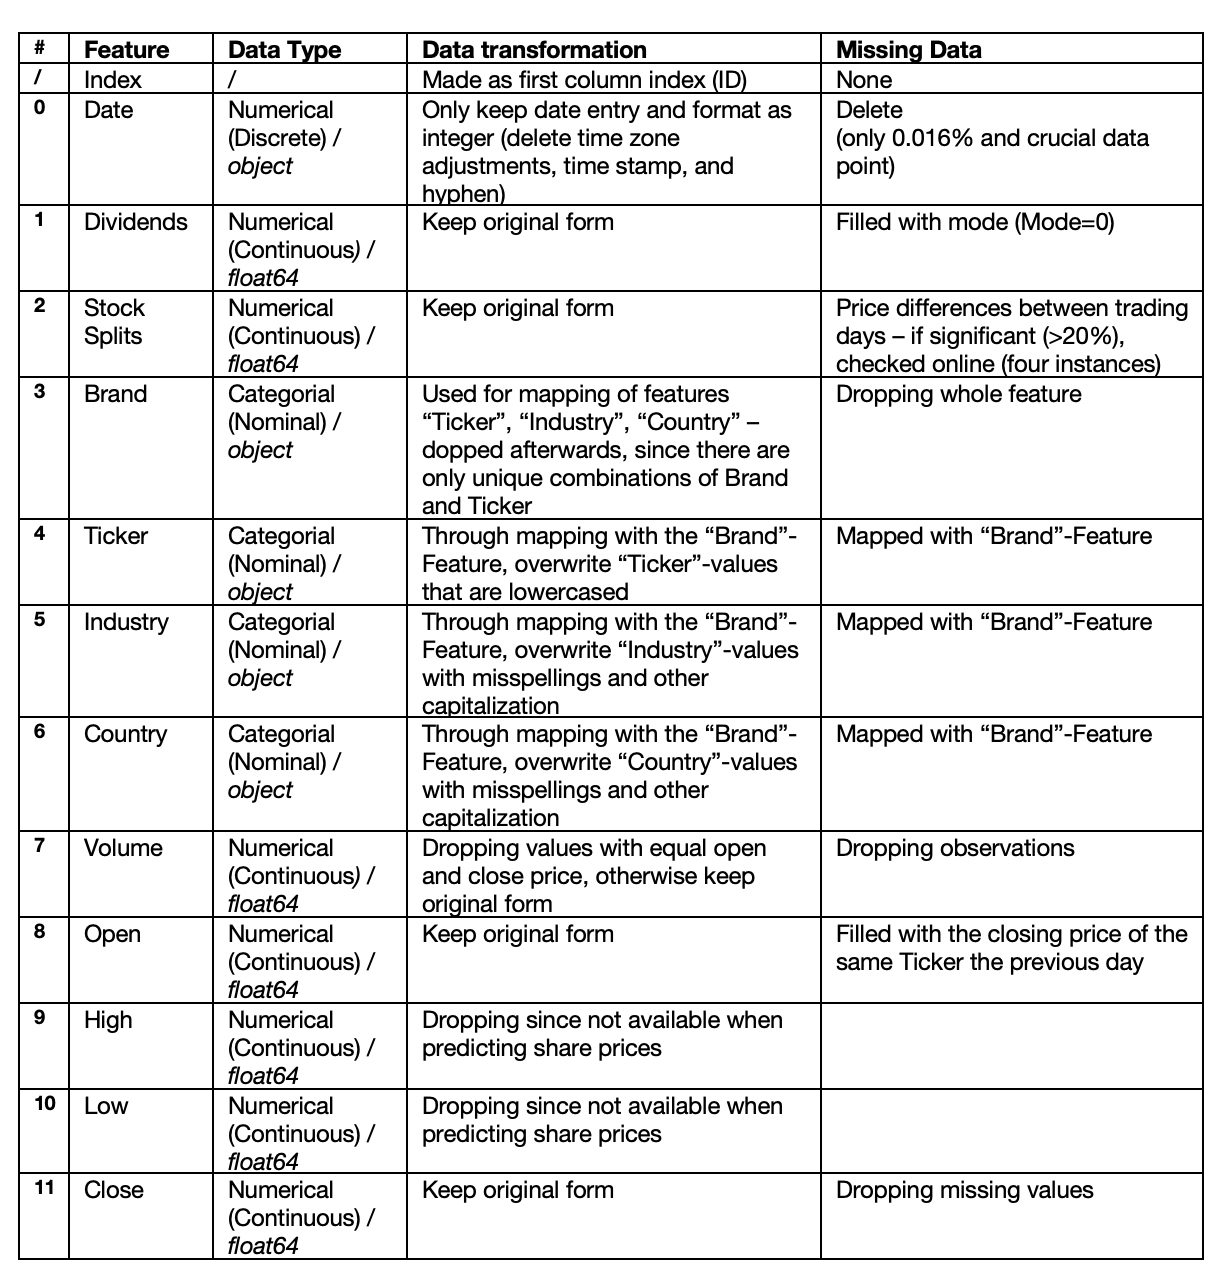

## **Feature Engineering and Modeling**

### First we introduce some justifications of foregoing decision for certain steps/methods in our pipeline

#### Feature: Dividends

We will impute the missing values with the mode of each companies' dividend payments as companies usually have constant dividend payments. We can also see this pattern in our data. Checking the dividend payments of those companies that have missing data in the dividends column we can see that the dividend amount "0.00" has by far the highest frequency. This step was included in our pipeline and was not done before in order to avoid data leakage when imputing missing values of the test and validation set with data from the training set.

In [53]:
# Checking dividend payments for those companies with missing data in the dividend column
missing_dividends = df_stocks[df_stocks['Dividends'].isnull()]

print("Companies with Missing Dividend Data:")
print(missing_dividends['Ticker'].unique())

for ticker in missing_dividends['Ticker'].unique():
    df_ticker = df_stocks[df_stocks['Ticker'] == ticker]
    print(f"\nDividend Data for {ticker}:")
    dividend_counts = df_ticker['Dividends'].value_counts().reset_index()
    dividend_counts.columns = ['Dividend Amount', 'Frequency']
    total_dividends = dividend_counts['Frequency'].sum()
    dividend_counts['Percentage'] = (dividend_counts['Frequency'] / total_dividends) * 100
    print(dividend_counts)
    print("--------------------------")

Companies with Missing Dividend Data:
['CL' 'MSFT' 'AEO' 'PG' 'COST' 'AXP' 'TM' 'NVDA' 'AMZN' 'NTDOY' 'HMC' 'KO'
 'AMD' 'JNJ' 'GOOGL' 'ADDYY' 'HD' 'MA' 'TGT' 'UBSFY' 'MAR' 'LOGI' 'JPM'
 'AAPL' 'DIS' 'FL' 'JWN' 'TSLA' 'MMM' 'MCD' 'SQ' 'LVMUY' 'CROX' 'V' 'SBUX'
 'BAMXF' 'ADBE' 'FDX']

Dividend Data for CL:
    Dividend Amount  Frequency  Percentage
0             0.000       2070   97.918638
1             0.120          4    0.189215
2             0.079          4    0.189215
3             0.290          3    0.141911
4             0.440          3    0.141911
5             0.430          3    0.141911
6             0.310          3    0.141911
7             0.160          3    0.141911
8             0.200          2    0.094607
9             0.180          2    0.094607
10            0.340          2    0.094607
11            0.360          2    0.094607
12            0.380          2    0.094607
13            0.420          2    0.094607
14            0.090          2    0.094607
15    

#### Feature Aggregation

We could use feature aggregation by for example using the average of "Open", "High" and "Low" or by using the volatility of "High" and "Low". However, we decided against it, since our orginal data set only has a total of 12 features and we think feature aggregation could make our model performance worse due to sparsity of data.

#### Data Balancing

Data Balancing is mainly used for classification tasks, where the distribution of examples across the classses is not equal. As our problem is a regression task, data balancing is not applicable.

### **First Approach: Regression**

In order to predict the stock price we first decided to run a linear regression with Elastic Net Regularization, since it combines both the advantages of Lasso and Ridge regularization. By that we ensure that both irrelevant features are set to zero (lasso) and to shrink less important features (ridge). This step also indirectly includes feature selection, as some coefficients are set to zero.

In the following code below, we started with some missing data cleaning steps (we are aware that the other steps could have also been included in our Pipeline later onwards, however since we needed to further understands parts of the data, we decided to modify our dataset directly).

As a next step, we had to encode our categorical features ("Ticker", "Industry", "Country", "UTC_Offset").  Given the relatively low number of different feature values for the feature "Country" (8 different values - see analysis above) and "UTC_Offset" (2 different values), we decided to use One-Hot Encoding. Given the cardinality associated with the categorical columns "Ticker" and "Industry", we decided to use Target (mean) encoding, which can help with faster learning (BUT: bears the risk of overfitting). We decided against testing what approach works best during Grid Search as conducting such an extensive search may require more computational resources and may not lead to significant improvements in model performance as the best approach can also be found by logical reasoning.

We were also thinking about adding polynomial features with degree n = 2, in order to examine interdependencies between variables. However, due to the large amount of dummy variables, it takes too much computational power/time to run the regression and do hyperparameter tunig. Therefore we decided to exclude this code block (has been commented out in the code below).

After that, we scaled the numerical features of our existing dataset in order to prepare it for training (and the ridge regularization). By that we ensured, that the regularization penalty is distributed proportionally across all features and features with higher coefficient are not punished more than others.
Initially, we were thinking about doing a Lasso regularization of the dataset with polynomial features instead and by doing so doing feature selection as the penalty sets the coefficients to excactly zero. However, since we decided against the inclusion of polynomial features, we went with a Ridge regularization instead in order to account for all features.

We decided to tune two hyperparameters:
- **alpha**: Represents the regularization strength of the Lasso regularization
- **l1_ratio**: Represents the weight on Lasso and Ridge respectively. Therefore, the values are between 0 & 1.


Since the grid of hyperparameters is relatively small, we decided to **Grid Search** to do hyperparameter tuning, despite the relatively large dataset and the additional computational power it needs compared to e.g., Randomized Search. For the number of maximum iterations, we manually decided to try various numbers of iterations of different scales in order to let the regression converge. Since we are dealing with time series data, we split the test set using TimeSeriesSplit form the sklearn.model_selection library.

The following code contains our approach for the midterm assignment, which was then modified based on the feedback provided. However, we also did one including boosting further below.

In [54]:
#pip install category_encoders

In [55]:
# Step 1: Define data cleaning transformer
def data_cleaning(X):
    X_cleaned = X.copy()
    X_cleaned['Dividends'] = X_cleaned.groupby('Ticker')['Dividends'].transform(lambda x: x.fillna(x.mode()[0]))
    return X_cleaned

# Step 2: Define column transformer for scaling numerical features
numerical_features = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open'] # deleted 'High', 'Low'
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 3: Define column transformer for encoding categorical features
# One-Hot encoding for 'Country' and 'UTC_Offset'
categorical_features = ['Country', 'UTC_Offset']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Target encoding for 'Ticker' and 'Industry'
target_enc_features = ['Ticker', 'Industry']
target_enc_transformer = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# Step 4: Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('onehot', categorical_transformer, categorical_features),
        ('target_enc', target_enc_transformer, target_enc_features)
    ])

'''# Step 5: Define column transformer for polynomial features
polynomial_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])'''

# Step 6: Define Elastic Net model for regularization
elastic_net = ElasticNet(max_iter=30000)
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 70, 90], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
scorer = make_scorer(r2_score)
tscv = TimeSeriesSplit(n_splits=5)

grid_search_lr = GridSearchCV(elastic_net, param_grid, cv=tscv, scoring=scorer)

# Step 6: Create pipeline
pipeline_ElasticNet = Pipeline(steps=[
    ('cleaning', FunctionTransformer(data_cleaning)),
    ('preprocessor', preprocessor),
    #('polynomial', polynomial_transformer),
    ('regressor', grid_search_lr)
])

# Step 7: Train the pipeline
pipeline_ElasticNet.fit(X_train, y_train)

Pipeline(steps=[('cleaning',
                 FunctionTransformer(func=<function data_cleaning at 0x2abe68cc0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day',
                                                   'Dividends', 'Stock Splits',
                                                   'Volume', 'Open']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'U...
                                                  Pipeline(steps=[('target_enc',
                                                                   TargetEncoder())]),
                                                  ['Ticker', 'Industry'])])),
                ('regressor',
                 GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                              estimator=ElasticNet(max_iter=30000),
                              param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5,
                                                    10, 50, 70, 90],
                                          'l1_ratio': [0.1, 0.3, 0.5, 0.7,
                                                       0.9]},
                              scoring=make_scorer(r2_score, response_method='predict')))])

In [56]:
best_params_lr = pipeline_ElasticNet.named_steps['regressor'].best_params_
best_score_lr = pipeline_ElasticNet.named_steps['regressor'].best_score_

print("Best Parameters:", best_params_lr)
print("Best Score:", best_score_lr)

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Best Score: 0.998600773914389


### **Second Approach: KNN Regression (without feature selection)**

For our second approach, we've opted for KNN Regression. It works by identifying the k-nearest neighbors in the training data and averaging their target values (close prices) to make predictions.

Generally, constructing and preparing the pipeline resembles the process used for simple linear regression outlined earlier.
We started our pipeline by dealing with missing data, followed by encoding categorical features using one-hot encoding and target encoding. This approach was chosen as the categorical features in our dataset have no inherent ranking. Conversely, numerical features were scaled using the standard scaler. This step ensures that no single feature dominates the model due to its larger size, a critical consideration for algorithms such as KNN that rely on distance calculations sensitive to the relative scales of features.

For the modeling part itself, we decided to tune two hyperparameters.
For the first hyperparameter number of  neighbors (n_neigbors) we decided to test for values between 1-400. Choosing a small value for n_neighbors, such as 1 or 3, may result in a more flexible model with higher variance but lower bias. This can capture local patterns well but may be sensitive to noise.
On the other hand, selecting larger values for n_neighbors, such as 45, 65, or even 400, increases the model's bias but reduces variance. This can lead to smoother decision boundaries and better generalization to unseen data. We decided to test for such high values of nearest neighbours as we work with a rather large data set (97.879 entries after data cleaning). However, we decided not to test for values beyond 400 as this would be computational very expensive.
By including a range of values for n_neighbors, the parameter grid allows for tuning the model's complexity, balancing bias and variance to find an optimal trade-off.
The second hyperparameter that we tuned were the weights of each datapoint when making predictions, which can be either set to 'uniform', with equal weights for all neigbors or 'distance', where closer neigbors have more influence on the prediction.

Similar to linear regression, we decided to use GridSearch for hyperparameter tuning, since we are only considering a small grid of hyperparameters.

In [57]:
#Pipeline without feature selection

# Step 1: Define data cleaning transformer
def data_cleaning(X):
    X_cleaned = X.copy()
    X_cleaned['Dividends'] = X_cleaned.groupby('Ticker')['Dividends'].transform(lambda x: x.fillna(x.mode()[0]))
    return X_cleaned

# Step 2: Define column transformer for scaling numerical features
numerical_features = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 3: Define column transformer for encoding categorical features
# One-Hot encoding for 'Country' and 'UTC_Offset'
categorical_features = ['Country', 'UTC_Offset']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Target encoding for 'Ticker' and 'Industry'
target_enc_features = ['Ticker', 'Industry']
target_enc_transformer = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# Step 4: Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('onehot', categorical_transformer, categorical_features),
        ('target_enc', target_enc_transformer, target_enc_features)
    ])

# Step 5: Define KNeighborsRegressor model
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 15, 25, 45, 65, 100, 150, 250, 300, 400],
    'weights': ['uniform', 'distance']
}
scorer = make_scorer(r2_score)
tscv = TimeSeriesSplit(n_splits=5)
grid_search_KNN1 = GridSearchCV(knn, param_grid, cv=tscv, scoring=scorer)

# Step 6: Create pipeline
pipeline_KNN1 = Pipeline(steps=[
    ('cleaning', FunctionTransformer(data_cleaning)),
    ('preprocessor', preprocessor),
    ('regressor', grid_search_KNN1)
])

# Step 7: Train the pipeline
pipeline_KNN1.fit(X_train, y_train)


Pipeline(steps=[('cleaning',
                 FunctionTransformer(func=<function data_cleaning at 0x2abe69580>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day',
                                                   'Dividends', 'Stock Splits',
                                                   'Volume', 'Open']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'U...
                                                  Pipeline(steps=[('target_enc',
                                                                   TargetEncoder())]),
                                                  ['Ticker', 'Industry'])])),
                ('regressor',
                 GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                              estimator=KNeighborsRegressor(),
                              param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15, 25,
                                                          45, 65, 100, 150, 250,
                                                          300, 400],
                                          'weights': ['uniform', 'distance']},
                              scoring=make_scorer(r2_score, response_method='predict')))])

In [58]:
best_params_KNN1 = pipeline_KNN1.named_steps['regressor'].best_params_
best_score_KNN1 = pipeline_KNN1.named_steps['regressor'].best_score_

print("Best Parameters:", best_params_KNN1)
print("Best Score:", best_score_KNN1)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.7613437801938026


### **Third Approach: KNN Regression (with feature selection)**

We also decided to build an additional pipeline including feature selection as the performance of a model can be degraded by the presence of noisy/irrelevant features. Since we encoded the features "Country" and "UTC_Offset" using One-Hot Encoding, the number of features in our dataset increased from 12 to 18 (see code below). Selecting a subset of the most relevant features can therefore help alleviate the curse of dimensionality, potentially improving the model's convergence properties and computational efficiency.
We decided to try the Filter method (univariate) as Model-based (embedded) feature selection method using logistic regression is not possible since we do not have a target value that is a classifier. For the Filter method, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected.
The SelectPercentile method with a percentile parameter allows us to specify the percentage of features to retain based on their scores computed by the specified scoring function (in this case, f_classif). This ensures that the model focuses on the most informative features while discarding the remaining ones.
We chose a percentile of 60%, which means that only the top 60% of features with the highest scores will be selected for model training. Originally we chose 30% but as our original dataset has a rather small number of features that the model is learning from, reducing the features by choosing a lower percentile might worsen our model performance by removing to many features. 

In [59]:
# Checking the number of features after encoding 
encoded_categorical_features = list(pipeline_KNN1.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out())
encoded_target_enc_features = list(pipeline_KNN1.named_steps['preprocessor'].transformers_[2][1]['target_enc'].get_feature_names_out())

encoded_features = numerical_features + encoded_categorical_features + encoded_target_enc_features

print("Total number of features after encoding:", len(encoded_features))

Total number of features after encoding: 18


In [60]:
#Pipeline with feature selection

# Step 1: Define data cleaning transformer
def data_cleaning(X):
    X_cleaned = X.copy()
    X_cleaned['Dividends'] = X_cleaned.groupby('Ticker')['Dividends'].transform(lambda x: x.fillna(x.mode()[0]))
    return X_cleaned

# Step 2: Define column transformer for scaling numerical features
numerical_features = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 3: Define column transformer for encoding categorical features
# One-Hot encoding for 'Country' and 'UTC_Offset'
categorical_features = ['Country', 'UTC_Offset']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Target encoding for 'Ticker' and 'Industry'
target_enc_features = ['Ticker', 'Industry']
target_enc_transformer = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# Step 4: Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('onehot', categorical_transformer, categorical_features),
        ('target_enc', target_enc_transformer, target_enc_features)
    ])


# Step 4: Define feature selection transformer
feature_selection = Pipeline(steps=[
    ('select', SelectPercentile(score_func=f_classif, percentile=60))
])

# Step 5: Define KNeighborsRegressor model
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 15, 25, 45, 65, 100, 150, 250, 300, 400],
    'weights': ['uniform', 'distance']
}
scorer = make_scorer(r2_score)
tscv = TimeSeriesSplit(n_splits=5)
grid_search_KNN2 = GridSearchCV(knn, param_grid, cv=tscv, scoring=scorer)

# Step 6: Create pipeline
pipeline_KNN2 = Pipeline(steps=[
    ('cleaning', FunctionTransformer(data_cleaning)),
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('regressor', grid_search_KNN2)
])

# Step 7: Train the pipeline
pipeline_KNN2.fit(X_train, y_train)

Pipeline(steps=[('cleaning',
                 FunctionTransformer(func=<function data_cleaning at 0x2abedc220>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day',
                                                   'Dividends', 'Stock Splits',
                                                   'Volume', 'Open']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'U...
                 Pipeline(steps=[('select', SelectPercentile(percentile=60))])),
                ('regressor',
                 GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                              estimator=KNeighborsRegressor(),
                              param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15, 25,
                                                          45, 65, 100, 150, 250,
                                                          300, 400],
                                          'weights': ['uniform', 'distance']},
                              scoring=make_scorer(r2_score, response_method='predict')))])

In [61]:
best_params = pipeline_KNN2.named_steps['regressor'].best_params_
best_score = pipeline_KNN2.named_steps['regressor'].best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.8374311597580899


### **Fourth approach: Regression with Ensembling Method**

As a next step for our Regression model, we decided to implement/hypertune two boosting methods, namely AdaBoost and and XGBoost. Therefore, we integrated these two in our pipeline, hypertune its parameters and select the best of the two based on the performance.

In the following lines, we are explaining why we chose AdaBoost and XGBoost and why we chose the respective hyperparamters to be tuned.

Since the Pipeline in its basic steps remained unchanges, we are not explain all steps once again but rather focus on the ensembling method.

**AdaBoost**: AdaBoostRegressor is a boosting algorithm used for regression tasks. It functions by fitting weak regressors to the data one after the other, with each new regressor emphasising more the cases that the preceding ones failed to adequately predict. By giving these mispredicted cases larger weights, it enables the succeeding regressors to give them more weight. Until the desired number of estimators is obtained or flawless predictions are made, this iterative procedure is carried out. Lastly, AdaBoostRegressor creates the final output by combining the predictions from each weak regressor. This typically results in a prediction accuracy that is higher than when utilising a single regressor.
Although AdaBoostRegressor is not as commonly utilized in practice today, it serves as a robust initial boosting model.

**XGBoost**: XGBoostRegressor, short for Extreme Gradient Boosting Regressor, is a highly efficient and scalable implementation of gradient boosting machines tailored for regression tasks. It builds a set of weak regression models, typically decision trees, one after the other. Every new model in the ensemble looks to fix the mistakes caused by the ones before it, emphasising the hard-to-predict cases. XGBoostRegressor is a problem domain-specific optimisation tool that uses an iterative gradient descent optimisation approach to minimise a user-defined loss function. Additionally, it provides a range of regularisation strategies to reduce overfitting and optimise the complexity of the model. XGBoostRegressor is well-known for its outstanding prediction capabilities and is frequently used in both real-world applications and machine learning contests.

**Hyperparamters used for AdaBoost**:
For AdaBoost we decided to train the following hyperparameters: *n_estimators and learning_rate*

**n_estimator** determines the number of base estimators (aka weak learners) to train sequentially. Typically, increasing this value improves performances but also requires higher computational time. Given the large dataset, we tried different values reaching from 50 to 250.

**learning_rate** describes the contribution of each weak learner to the final prediction. Typically, lower values result in slower learning but can lead to better generalization. By its nature, value for learning rate are limited from zero to one.


**Hyperparamters used for XGBoost**:

For XGBoost, we decided to train the following hyperparameters:

**learning_rate:** step size at each iteration while moving toward a minimum of the loss function.

**max_depth:** Maximum depth of a tree, controlling the maximum number of nodes per tree.

**min_child_weight:** minimum sum of instance weight needed in a child

**subsample:** fraction of samples used to fit each individual tree

**colsample_bytree:** fraction of features used when building each tree

**n_estimators:** number of trees in the ensemble

**gamma:** minimum loss reduction required to make a further partition on a leaf node of the tree.

**alpha:** L1 regularization term on weights
**lambda:**  L2 regularization term on weights
**max_delta_step:** maximum delta step allowed for each tree's weight estimation

For all the parameters mentioned above, we tried ranges across the most common ranges.

All in all, given the large size of the parametergrid, we decided to RandomizedSearchCV in order to reduce required computational power.

In [62]:
# Step 1: Define data cleaning transformer
def data_cleaning(X):
    X_cleaned = X.copy()
    X_cleaned['Dividends'] = X_cleaned.groupby('Ticker')['Dividends'].transform(lambda x: x.fillna(x.mode()[0]))
    return X_cleaned

# Step 2: Define column transformer for scaling numerical features
numerical_features = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 3: Define column transformer for encoding categorical features
# One-Hot encoding for 'Country' and 'UTC_Offset'
categorical_features = ['Country', 'UTC_Offset']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Target encoding for 'Ticker' and 'Industry'
target_enc_features = ['Ticker', 'Industry']
target_enc_transformer = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# Step 4: Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('onehot', categorical_transformer, categorical_features),
        ('target_enc', target_enc_transformer, target_enc_features)
    ])


# Define the pipeline
pipeline = Pipeline(steps=[('cleaning', FunctionTransformer(data_cleaning)),
                           ('preprocessor', preprocessor),
                           ('regressor', 'passthrough')])

# Define the parameter grid for randomized search
param_distributions_custom_combined = [
    {
        'regressor': [AdaBoostRegressor()],
        'regressor__n_estimators': [50, 80, 120, 150, 200, 250],
        'regressor__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    },
    {
        'regressor': [XGBRegressor()],
        'regressor__learning_rate': uniform(0.01, 0.3),
        'regressor__max_depth': randint(3, 11),
        'regressor__min_child_weight': randint(1, 11),
        'regressor__subsample': uniform(0.5, 0.8),
        'regressor__colsample_bytree': uniform(0.5, 0.8),
        'regressor__n_estimators': randint(50, 201),
        'regressor__gamma': uniform(0, 1),
        'regressor__alpha': uniform(0, 1),
        'regressor__lambda': uniform(0, 1),
        'regressor__max_delta_step': randint(0, 11)
    }
]


# Define scorer and time series split
scorer = make_scorer(r2_score)
tscv = TimeSeriesSplit(n_splits = 5)

# Perform randomized search
random_search_lr_boost = RandomizedSearchCV(pipeline, param_distributions=param_distributions_custom_combined, scoring=scorer, cv=tscv, n_iter= 100, verbose=2, random_state=42, n_jobs=-1)
random_search_lr_boost.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", random_search_lr_boost.best_params_)
print("Best R^2 score found: ", random_search_lr_boost.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.5, regressor__n_estimators=200; total time=   5.0s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.3, regressor__n_estimators=200; total time=   5.4s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.5, regressor__n_estimators=200; total time=   7.5s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=1.0, regressor__n_estimators=80; total time=   2.2s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.5, regressor__n_estimators=200; total time=  10.9s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.3, regressor__n_estimators=200; total time=  11.4s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=1.0, regressor__n_estimators=80; total time=   3.1s
[CV] END regressor=AdaBoostRegressor(), regressor__learning_rate=0.5, regressor__n_estimators=200; total time=  1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

Best parameters found:  {'regressor': AdaBoostRegressor(), 'regressor__learning_rate': 1.0, 'regressor__n_estimators': 50}
Best R^2 score found:  0.9173521685777354


In [63]:
# Print best parameters and score

best_params_boost = random_search_lr_boost.best_params_
best_score_boost = random_search_lr_boost.best_score_

print("Best parameters found: ", best_params_boost)
print("Best R^2 score found: ", best_score_boost)

Best parameters found:  {'regressor': AdaBoostRegressor(), 'regressor__learning_rate': 1.0, 'regressor__n_estimators': 50}
Best R^2 score found:  0.9173521685777354


### **Fifth approach: Neural Network**

#### Why We Used a Neural Network for Stock Price Prediction

To optimize our regression model, we decided to implement a neural network to detect subtle patterns and relationships across various market features. In the following sections, we explain why we chose a neural network and the specific technical decisions made during implementation.

Neural networks excel at identifying trends that traditional statistical models often miss. They handle market noise inherently well, ensuring accurate predictions even with anomalies and market spikes. Their robust predictive power makes them exceptionally well-suited for stock price prediction. To maintain stability and prevent overfitting, dynamic techniques like early stopping and gradient clipping were employed.

**Neural Network Architecture:**

The neural network architecture consists of four fully connected layers:

**Layer 1:** Input to 128 neurons with ReLU activation and dropout.

**Layer 2:** 128 neurons to 64 neurons with ReLU activation and dropout.

**Layer 3:** 64 neurons to 32 neurons with ReLU activation.

**Layer 4:** 32 neurons to 1 neuron (output layer).

This structure ensures that subtle patterns across various features are captured effectively.

**Training Process:**

The training process was carefully designed with the following features:

**Early Stopping:** Monitors validation loss and halts training once no further improvement is observed.
**Gradient Clipping:** Constrains gradients to prevent numerical instability.
**Loss Function and Optimizer:** The Mean Squared Error (MSE) loss function measures prediction accuracy, while the Adam optimizer updates model parameters.

--> The training loop involves iterating through training data in batches and updating model parameters based on the MSE loss.

**Hyperparameters used for the Neural Network:**

**Architecture (Input):**
**Layer 1:** 85 features, 128 neurons, ReLU activation.
**Layer 2:** 128 neurons to 64 neurons, ReLU activation.
**Layer 3:** 64 neurons to 32 neurons, ReLU activation.
**Layer 4:** 32 neurons to 1 neuron (output layer).

**Dropout Rate:** 0.2.
**Learning Rate:** 1e-5.
**Gradient Clipping:** 1.0.

**Training Settings:**

**Number of Epochs:** 400.
**Patience:** 5.

#### Neural Network

In [64]:
# Dataset Class
class StockDataset_NN(Dataset):
    def __init__(self, data_NN, targets_NN):
        self.data_NN = torch.tensor(data_NN, dtype=torch.float32)
        self.targets_NN = torch.tensor(targets_NN, dtype=torch.float32)
    def __len__(self):
        return len(self.data_NN)
    def __getitem__(self, idx):
        return self.data_NN[idx], self.targets_NN[idx]

# Step 1: Define data cleaning transformer
def data_cleaning_NN(X_NN):
    X_cleaned_NN = X_NN.copy()
    X_cleaned_NN['Dividends'] = X_cleaned_NN.groupby('Ticker')['Dividends'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
    return X_cleaned_NN

# Step 2: Define column transformer for scaling numerical features
numerical_features_NN = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open']
numerical_transformer_NN = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 3: Define column transformer for encoding categorical features
# One-Hot encoding for 'Country' and 'UTC_Offset'
categorical_features_NN = ['Country', 'UTC_Offset']
categorical_transformer_NN = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Target encoding for 'Ticker' and 'Industry'
target_enc_features_NN = ['Ticker', 'Industry']
target_enc_transformer_NN = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# Step 4: Combine transformers
preprocessor_NN = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_NN, numerical_features_NN),
        ('onehot', categorical_transformer_NN, categorical_features_NN),
        ('target_enc', target_enc_transformer_NN, target_enc_features_NN)
    ])

# Define the pipeline
pipeline_NN = Pipeline(steps=[('cleaning', FunctionTransformer(data_cleaning_NN)),
                              ('preprocessor', preprocessor_NN)])

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined
X_train_processed_NN = pipeline_NN.fit_transform(X_train, y_train)
X_val_processed_NN = pipeline_NN.transform(X_val)
X_test_processed_NN = pipeline_NN.transform(X_test)

# Verify for NaNs in the processed data
def check_for_nans_NN(name_NN, data_NN):
    print(f"Checking for NaNs in {name_NN}...")
    nan_count_NN = np.isnan(data_NN).sum()
    if nan_count_NN > 0:
        print(f"NaN values found in {name_NN}: {nan_count_NN}")
    else:
        print(f"No NaN values found in {name_NN}.")

check_for_nans_NN("X_train_processed_NN", X_train_processed_NN)
check_for_nans_NN("X_val_processed_NN", X_val_processed_NN)
check_for_nans_NN("X_test_processed_NN", X_test_processed_NN)

# Create datasets
train_dataset_NN = StockDataset_NN(X_train_processed_NN, y_train.values)
val_dataset_NN = StockDataset_NN(X_val_processed_NN, y_val.values)
test_dataset_NN = StockDataset_NN(X_test_processed_NN, y_test.values)

# Create dataloaders
train_loader_NN = DataLoader(train_dataset_NN, batch_size=64, shuffle=True)
val_loader_NN = DataLoader(val_dataset_NN, batch_size=64, shuffle=False)
test_loader_NN = DataLoader(test_dataset_NN, batch_size=64, shuffle=False)

# Neural Network Architecture
class NeuralNetwork_NN(nn.Module):
    def __init__(self, input_dim_NN):
        super(NeuralNetwork_NN, self).__init__()
        self.fc1_NN = nn.Linear(input_dim_NN, 128)
        self.fc2_NN = nn.Linear(128, 64)
        self.fc3_NN = nn.Linear(64, 32)
        self.fc4_NN = nn.Linear(32, 1)
        self.relu_NN = nn.ReLU()
        self.dropout_NN = nn.Dropout(0.2)
    
    def forward(self, x_NN):
        x_NN = self.relu_NN(self.fc1_NN(x_NN))
        x_NN = self.dropout_NN(x_NN)
        x_NN = self.relu_NN(self.fc2_NN(x_NN))
        x_NN = self.dropout_NN(x_NN)
        x_NN = self.relu_NN(self.fc3_NN(x_NN))
        x_NN = self.fc4_NN(x_NN)
        return x_NN

# Initialize model
input_dim_NN = X_train_processed_NN.shape[1]
model_NN = NeuralNetwork_NN(input_dim_NN)

# Loss and optimizer
criterion_NN = nn.MSELoss()
optimizer_NN = optim.Adam(model_NN.parameters(), lr=1e-5)

# Use GPU if available
device_NN = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_NN.to(device_NN)

# Training Loop with Early Stopping and Gradient Clipping
def train_model_NN(model_NN, criterion_NN, optimizer_NN, train_loader_NN, val_loader_NN, num_epochs_NN=400, patience_NN=5):
    best_loss_NN = float('inf')
    patience_counter_NN = 0
    clip_value_NN = 1.0  # Gradient clipping value
    for epoch_NN in range(num_epochs_NN):
        # Training
        model_NN.train()
        train_loss_NN = 0.0
        for inputs_NN, targets_NN in train_loader_NN:
            inputs_NN, targets_NN = inputs_NN.to(device_NN), targets_NN.to(device_NN)
            optimizer_NN.zero_grad()
            outputs_NN = model_NN(inputs_NN).squeeze()
            loss_NN = criterion_NN(outputs_NN, targets_NN)
            if not torch.isnan(loss_NN):
                loss_NN.backward()
                nn.utils.clip_grad_norm_(model_NN.parameters(), clip_value_NN)
                optimizer_NN.step()
                train_loss_NN += loss_NN.item() * inputs_NN.size(0)
        
        # Validation
        model_NN.eval()
        val_loss_NN = 0.0
        with torch.no_grad():
            for inputs_NN, targets_NN in val_loader_NN:
                inputs_NN, targets_NN = inputs_NN.to(device_NN), targets_NN.to(device_NN)
                outputs_NN = model_NN(inputs_NN).squeeze()
                loss_NN = criterion_NN(outputs_NN, targets_NN)
                if not torch.isnan(loss_NN):
                    val_loss_NN += loss_NN.item() * inputs_NN.size(0)
        
        train_loss_NN /= len(train_loader_NN.dataset)
        val_loss_NN /= len(val_loader_NN.dataset)
        
        print(f"Epoch {epoch_NN+1}/{num_epochs_NN}, Train Loss: {train_loss_NN:.4f}, Val Loss: {val_loss_NN:.4f}")
        
        # Early Stopping
        if val_loss_NN < best_loss_NN:
            best_loss_NN = val_loss_NN
            torch.save(model_NN.state_dict(), 'best_model_NN.pt')
            patience_counter_NN = 0
        else:
            patience_counter_NN += 1
            if patience_counter_NN >= patience_NN:
                print(f"Early stopping at epoch {epoch_NN+1}")
                break

# Train the model
train_model_NN(model_NN, criterion_NN, optimizer_NN, train_loader_NN, val_loader_NN, num_epochs_NN=400, patience_NN=5)


Checking for NaNs in X_train_processed_NN...
No NaN values found in X_train_processed_NN.
Checking for NaNs in X_val_processed_NN...
No NaN values found in X_val_processed_NN.
Checking for NaNs in X_test_processed_NN...
No NaN values found in X_test_processed_NN.
Epoch 1/400, Train Loss: 3399.0139, Val Loss: 35741.9648
Epoch 2/400, Train Loss: 2580.8536, Val Loss: 31381.6875
Epoch 3/400, Train Loss: 1601.2537, Val Loss: 26513.7789
Epoch 4/400, Train Loss: 1253.6443, Val Loss: 25100.2066
Epoch 5/400, Train Loss: 1169.0527, Val Loss: 24456.5418
Epoch 6/400, Train Loss: 1129.2212, Val Loss: 23978.5310
Epoch 7/400, Train Loss: 1108.5564, Val Loss: 23676.2818
Epoch 8/400, Train Loss: 1063.8052, Val Loss: 23678.4725
Epoch 9/400, Train Loss: 1059.0624, Val Loss: 23211.3703
Epoch 10/400, Train Loss: 1058.1839, Val Loss: 22923.2456
Epoch 11/400, Train Loss: 1047.9281, Val Loss: 22759.3589
Epoch 12/400, Train Loss: 1041.3913, Val Loss: 22624.8307
Epoch 13/400, Train Loss: 1016.5498, Val Loss: 22

## **Model Selection & Evaluation**

### **Selection of Best Model**

#### Scoring Method for all Models

**Justification**
We chose R-squared, MSE, MAPE, Explained Variance, and Median Absolute Error to evaluate our model, because:

- **R-squared** helps assess how well variations in stock prices are explained by the models.
- **MSE** is important for quantifying the average squared difference between the estimated values and the actual value, crucial in financial predictions where large errors can be costly.
- **MAPE** provides a clear percentage-based measure which can be more intuitive.
- **Median Absolute Error** offers a robust alternative to MSE, less sensitive to outliers

In [65]:
# Here we evaluate all models except the Neural Network
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, name="Model"):
    # Storing results for easy comparison
    results = {}

    y_pred_test = model.predict(X_test)

    results['R2'] = r2_score(y_test, y_pred_test)
    results['MSE'] = mean_squared_error(y_test, y_pred_test)
    results['MAPE'] = mean_absolute_percentage_error(y_test, y_pred_test)
    results['Median AE'] = median_absolute_error(y_test, y_pred_test)

    # Printing a summary
    print(f"{name} - Test Set Performance:")
    print(f"R2: {results['R2']:.4f}, MSE: {results['MSE']:.4f}, MAPE: {results['MAPE']:.4f}, Median AE: {results['Median AE']:.4f}\n")

    return results

In [66]:
# Evaluation on Test Set for Neural Network
def evaluate_model_NN(model_NN, test_loader_NN, name="Neural Network"):
    model_NN.eval()
    criterion_NN = nn.MSELoss()
    predictions_NN, targets_list_NN = [], []
    with torch.no_grad():
        for inputs_NN, targets_NN in test_loader_NN:
            inputs_NN, targets_NN = inputs_NN.to(device_NN), targets_NN.to(device_NN)
            outputs_NN = model_NN(inputs_NN).squeeze()
            loss_NN = criterion_NN(outputs_NN, targets_NN)
            predictions_NN.append(outputs_NN.cpu().numpy())
            targets_list_NN.append(targets_NN.cpu().numpy())
    
    predictions_NN = np.concatenate(predictions_NN)
    targets_list_NN = np.concatenate(targets_list_NN)
    
    # Calculate Metrics
    r2 = r2_score(targets_list_NN, predictions_NN)
    mse = mean_squared_error(targets_list_NN, predictions_NN)
    mape = mean_absolute_percentage_error(targets_list_NN, predictions_NN)
    median_ae = median_absolute_error(targets_list_NN, predictions_NN)
    
    results = {
        'R2': r2,
        'MSE': mse,
        'MAPE': mape,
        'Median AE': median_ae
    }
    
    # Printing a summary
    print(f"{name} - Test Set Performance:")
    print(f"R2: {results['R2']:.4f}, MSE: {results['MSE']:.4f}, MAPE: {results['MAPE']:.4f}, Median AE: {results['Median AE']:.4f}\n")
    
    return results

#results_NN = evaluate_model_NN(model_NN, test_loader_NN, name="Neural Network")
#print(results_NN)

#### Baseline Model

**Justification**:

**Previous Value Prediction (Naive Forecasting):**
- **Purpose**: This baseline tests the basic predictive ability of our models against the simplest form of time series forecasting, which assumes the next value is identical to the last observed one. Outperforming this naive forecast indicates that our models are capturing meaningful patterns and not just echoing the latest data point.
- **Significance**: It is a robust test that challenges our models to demonstrate they can do more than maintain status quo predictions, encouraging the identification of real trends and changes in the data.
- **Methodology**: Using the last observed stock price as the next prediction provides a clear baseline for measuring improvements brought by leveraging historical data and sophisticated algorithms.

These baseline models are deliberately simple, designed to clearly delineate the incremental benefits brought by employing more advanced data analysis techniques.

In [67]:
class NaiveForecasting:
    def fit(self, X, y):
        # Not needed for naive forecasting but included for interface compatibility
        pass
    
    def predict(self, X):
        # Shift the data to predict the next step using the previous value
        if isinstance(X, pd.DataFrame):
            # Use the forward fill method to replace the NaNs that appear after the shift
            return X.iloc[:, 0].shift(1).ffill().bfill().values
        else:
            # For non-DataFrame inputs, shift the array and replace NaNs
            shifted = np.roll(X, 1)
            # Use the second element to replace the first to avoid initial NaN
            shifted[0] = shifted[1]
            return shifted

naive_forecast_baseline = NaiveForecasting()

# Initialize the dictionary to store results if not already existing
if 'baseline_results' not in globals():
    baseline_results = {}

# Evaluate the Naive Forecasting baseline using the same function
baseline_results['Naive Forecasting'] = evaluate_model(naive_forecast_baseline, X_train, y_train, X_val, y_val, X_test, y_test, "Naive Forecasting")

Naive Forecasting - Test Set Performance:
R2: -0.4661, MSE: 75076.4238, MAPE: 0.9999, Median AE: 108.2466



#### Final Selection of Best Model

**Justification for Model Selection**

**Metric Choice**: We selected Median Absolute Error (Median AE) for its robustness to outliers, making it suitable for our dataset, which may include skewed data. This metric focuses on the central tendency of errors, providing a realistic measure of model performance under typical conditions.

**Inclusion of Baselines**: Including baseline models in our evaluation ensures that any complex model we choose clearly outperforms simpler benchmarks. This comparison is critical to justify the additional complexity of advanced models.

**Rationale**: Median AE is preferred where median values are more indicative of typical performance than means. This aligns with our goal to develop a reliable model for normal operational conditions, ensuring practical relevance.

**Conclusion**: Using Median AE helps us select a model that is both statistically sound and practically effective, ensuring our final model choice is well-justified and aligned with project objectives.

In [68]:
#!pip install --upgrade numpy scipy scikit-learn ##uncomment, if problem with AttributeError: 'NoneType' object has no attribute 'split occurs again

In [69]:
model_performance = {}

# Evaluate each active model and store results
model_performance['ElasticNet'] = evaluate_model(pipeline_ElasticNet, X_train, y_train, X_val, y_val, X_test, y_test, "ElasticNet Regression")
model_performance['KNN Without FS'] = evaluate_model(pipeline_KNN1, X_train, y_train, X_val, y_val, X_test, y_test, "KNN Regression Without Feature Selection")
model_performance['KNN With FS'] = evaluate_model(pipeline_KNN2, X_train, y_train, X_val, y_val, X_test, y_test, "KNN Regression With Feature Selection")
model_performance['Ensemble'] = evaluate_model(random_search_lr_boost, X_train, y_train, X_val, y_val, X_test, y_test, "Ensemble Methods (AdaBoost & XGBoost)")
model_performance['Neural Network'] = evaluate_model_NN(model_NN, test_loader_NN, name="Neural Network")


# Evaluate Naive Forecasting using the same function
# Assuming NaiveForecasting has been defined and evaluated as per previous adjustments
naive_forecast_baseline = NaiveForecasting()
baseline_results['Naive Forecasting'] = evaluate_model(naive_forecast_baseline, X_train, y_train, X_val, y_val, X_test, y_test, "Naive Forecasting")


# Include the Naive Forecasting results in the model_performance dictionary
model_performance.update({'Naive Forecasting': baseline_results['Naive Forecasting']})

# Selecting the best model based on the lowest Median Absolute Error
best_model = min(model_performance, key=lambda x: model_performance[x]['Median AE'])
print(f"The best performing model based on Median Absolute Error is {best_model} with a Median AE of {model_performance[best_model]['Median AE']:.4f}")


ElasticNet Regression - Test Set Performance:
R2: 0.9996, MSE: 22.3246, MAPE: 0.0170, Median AE: 0.9698

KNN Regression Without Feature Selection - Test Set Performance:
R2: 0.4951, MSE: 25856.5522, MAPE: 0.5525, Median AE: 49.5941

KNN Regression With Feature Selection - Test Set Performance:
R2: 0.5068, MSE: 25254.0283, MAPE: 0.4549, Median AE: 42.0700

Ensemble Methods (AdaBoost & XGBoost) - Test Set Performance:
R2: 0.6848, MSE: 16138.3902, MAPE: 0.2037, Median AE: 7.8174

Neural Network - Test Set Performance:
R2: 0.9990, MSE: 51.2836, MAPE: 0.0803, Median AE: 4.9137

Naive Forecasting - Test Set Performance:
R2: -0.4661, MSE: 75076.4238, MAPE: 0.9999, Median AE: 108.2466

The best performing model based on Median Absolute Error is ElasticNet with a Median AE of 0.9698


From the provided results, the ElasticNet Regression model outperforms the other models with the highest R² value of 0.9996, indicating an almost perfect fit. It also has the lowest Median Absolute Error (MAE) of 0.9611, suggesting that it makes predictions very close to the actual values, which is critical in stock price prediction for making accurate investment decisions. We are aware that this performance lies within the nature of the features, which make the prediction almost impossible to deviate really far, since the information of the same trading day a given in the open feature. 

The other models show significantly poorer performance in both R² and MAE metrics, making ElasticNet the most suitable choice for predicting stock prices reliably.

### **Evaluation of Best Model**

#### Time Series Cross Validation

**Justification for Time Series Cross-Validation Approach**

**Objective**: The goal is to ensure an unbiased evaluation of the predictive performance of time-series models, which necessitates a validation technique that maintains the chronological order of data.

**Method**: We utilize the `TimeSeriesSplit` from `scikit-learn` for cross-validation, chosen specifically for time-series data for the following key reasons:

1. **Temporal Integrity**: `TimeSeriesSplit` preserves the order of data, ensuring that predictions for any point are only based on past data, thereby preventing data leakage and simulating real-world forecasting scenarios.

2. **Incremental Learning**: This method mimics practical applications where models are updated as new data becomes available, by using all accessible data up to a point in time as the training set and testing on subsequent data.

3. **Generalization Capability**: Employing multiple temporal splits helps assess the model's stability and ability to generalize across different time periods, critical for models used in dynamic environments like financial markets.

4. **Balance Between Efficiency and Insight**: Opting for five splits balances computational demands with detailed insights into model performance over time, providing a thorough yet efficient evaluation framework.

**Implications**: Using this approach, we can robustly estimate how well the model will perform on unseen future data, which is vital for time-series forecasting models where the sequence and continuity of data are crucial.

In [70]:
# Setup the TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Define a function to perform the time-series cross-validation
def evaluate_time_series_cv(model, X, y, cv):
    mse_scores = []  # To store the mean squared error for each fold
    print("Cross-Validation Results:")

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"Fold MSE: {mse}")

    return np.mean(mse_scores), np.std(mse_scores)

# Assuming pipeline_ElasticNet is your selected best model
mean_mse, std_mse = evaluate_time_series_cv(pipeline_ElasticNet, X, y, tscv)

print(f"Average MSE across folds: {mean_mse}")
print(f"Standard Deviation of MSE across folds: {std_mse}")

Cross-Validation Results:
Fold MSE: 0.4750058469546814
Fold MSE: 0.783282890586167
Fold MSE: 14.476676194770102
Fold MSE: 6.848245877102951
Fold MSE: 21.840814063277584
Average MSE across folds: 8.884804974538296
Standard Deviation of MSE across folds: 8.241773469970752


The variability in Mean Squared Error (MSE) from our ElasticNet model's time-series cross-validation indicates that the model's performance fluctuates significantly across different market conditions. Specifically, the model performs well under stable conditions, evidenced by a low MSE of 0.475, yet struggles during periods of high volatility or significant market events, as shown by a high MSE of 21.840. This inconsistency could present risks in applications such as automated trading systems, where stability and predictability are essential. To enhance reliability and mitigate potential risks, we might consider refining the model with more robust features or integrating risk management strategies that accommodate the observed variability in predictions.This again strengthens our thesis that the features in the dataset are not enough for this prediction and overall market conditions should be inserted as well. 

#### Learning Curves

We decided on incorporating a learning curve into the evaluation of machine learning models:

- Assessment of Learning Efficiency: Learning curves provide a graphical representation of the model's performance as it learns from varying amounts of training data. This visualization helps in understanding how effectively the model is learning over time.
- Diagnosis of Model Behavior: These curves are instrumental in diagnosing issues related to underfitting (high bias) and overfitting (high variance). By examining the divergence between training and validation scores, we can determine if the model is too simple or overly complex for the data.
- **Training Data Utilization:** Learning curves show the impact of increasing the training data size on model performance, indicating whether more data might improve model outcomes or if diminishing returns are being reached.

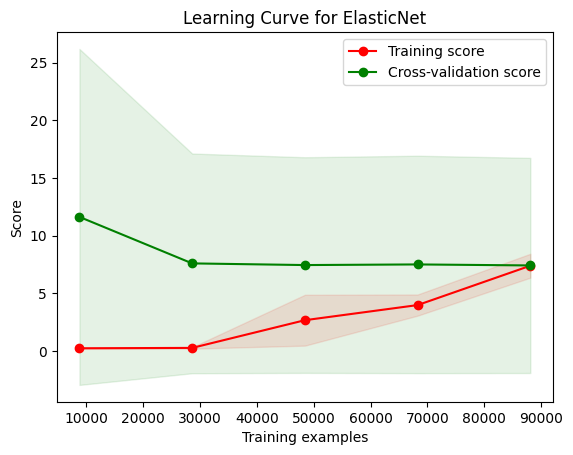

In [71]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")

    # Convert scores to positive values
    train_scores = -train_scores
    test_scores = -test_scores

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(pipeline_ElasticNet, "Learning Curve for ElasticNet", X, y, cv=10, n_jobs=-1)
plt.show()

The learning curve for the ElasticNet model indicates that while training scores improve with more data, the cross-validation scores remain stable or slightly decreases, suggesting that additional data does not enhance the model's generalization to new data. This behavior could indicate potential overfitting with increased model complexity. In practical business terms, this means that simply expanding the training dataset may not yield better forecasting accuracy for financial markets.
It highlights the importance of optimizing model tuning and feature selection or even better incorporating macroeconomic indicators to enhance generalization, rather than merely increasing dataset size. 

Incorporating macroeconomic indicators such as interest rates, inflation rates, and GDP growth could enhance the ElasticNet model's predictive accuracy by capturing broader economic impacts on stock prices. Additionally, integrating sentiment analysis from financial news and social media could provide real-time insights into market trends and investor behavior. These new features could address potential gaps in our current model, which relies heavily on historical price data and may not adequately account for external market influences, thereby improving its robustness and generalization to unseen data.

## **Interpretability of final model**

In this section we aim to explore how our best model makes decisions and what features are most important in predicting stock prices. We will use a post hoc approach where model interpretability is achieved by applying interpretation methods that analyze the model after training.

We will be using the ElasticNet Model for this section as this is our best model found above during model selection. 

In [72]:
best_params = pipeline_ElasticNet.named_steps['regressor'].best_params_

best_model = Pipeline([
    ('cleaning', FunctionTransformer(data_cleaning)),
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=30000, alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio']))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('cleaning',
                 FunctionTransformer(func=<function data_cleaning at 0x2abedc400>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day',
                                                   'Dividends', 'Stock Splits',
                                                   'Volume', 'Open']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'UTC_Offset']),
                                                 ('target_enc',
                                                  Pipeline(steps=[('target_enc',
                                                                   TargetEncoder())]),
                                                  ['Ticker', 'Industry'])])),
                ('regressor',
                 ElasticNet(alpha=0.001, l1_ratio=0.9, max_iter=30000))])

When using a Linear Regression model we can determine feature importance by looking at the coefficient weights assigned to each feature.

Interpretation of weights for numerical features:
- Positive weight: As feature value increases, target value also increases
- Negative weight: As feature value increses, target value decreases
- Zero weight: L1 regularization drives the coefficient to 0, which removes those features from the model 

Interpretation of weights for binary features: 
- Changing the feature from the reference category to the other category changes the estimated outcome by the feature's coefficient.

Interpretation of weight for categorical feature: 
- Changing feature value from the reference category to the other category increases the prediction for the value of the corresponding coefficient when all the other features remain fixed.

A feature is important if its coefficient has high absolute value and the variance around this estimate is low.

In [73]:
feature_weights = best_model.named_steps['regressor'].coef_
feature_weights_dict = dict(zip(encoded_features, feature_weights))

print("Feature weights:")
for feature, weight in feature_weights_dict.items():
    print(f"{feature}: {weight}")

Feature weights:
Year: 0.06275648045678091
Month: 0.002432519043055092
Day: -0.007284644998235599
Dividends: 0.0011735136909364694
Stock Splits: 0.0
Volume: -0.0006679750734820552
Open: 49.43987496088716
Country_canada: -0.0
Country_france: -0.0
Country_germany: -0.0007487743036814034
Country_japan: 0.0
Country_netherlands: 0.0
Country_switzerland: 0.0
Country_usa: 0.0
UTC_Offset_-04:00: -0.005386561591444248
UTC_Offset_-05:00: 0.0010034556715919352
Ticker: 0.004436798538229153
Industry: 0.00014070188779978043


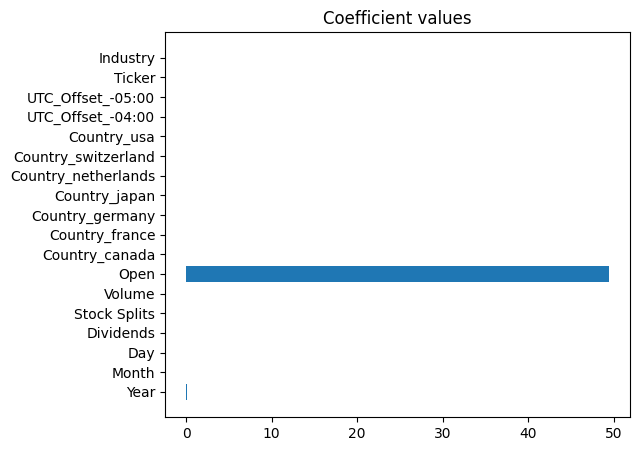

In [74]:
plt.figure(figsize=(6, 5))
plt.barh(encoded_features, best_model.named_steps['regressor'].coef_)
plt.title("Coefficient values")
plt.show()

Looking at the different feature weights we can see that the feature "Open" has by far the highest weight assigned to it (49.44). This makes sense as the opening price in comparison to our other features is the most informative feature when predicting stock prices. The second highest absolute weight was assigned to the feature "Year" (0.06), but with great distance to the feature "Open". 
Furthermore, we can see that some features where completely removed from our model (coefficient value of zero). 

Those features were mostly the one-hot encoded "Country" features. 

This leads to the conclusion that the prediction of our model almost solely relies on the feature "Open".   

### Permutation Feature Importance

Next we wanted to validate our findings using permutation feature importance. Permutation feature importance measures the increase in the prediction error of the model after we permuted the
feature's values and provides a global insight into the model's behavior.

In [75]:
#Using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

sorted_indices = result.importances_mean.argsort()[::-1]
feature_names = X_test.columns

Important_feature_1=feature_names[sorted_indices[0]]
Important_feature_2=feature_names[sorted_indices[1]]
Important_feature_3=feature_names[sorted_indices[2]]
Important_feature_4=feature_names[sorted_indices[3]]
Important_feature_5=feature_names[sorted_indices[4]]

print("Most important features:")
print(Important_feature_1)
print(Important_feature_2)
print(Important_feature_3)
print(Important_feature_4)
print(Important_feature_5)

Most important features:
Open
Ticker
Year
Industry
Country


Also here we can see that the feature "Open" was ranked to be the most important feature. However, we do not have any information about how it influences our model predcition. Therefore, we will check the Partial Dependence Plots of the 5 most important features found.

### Partial Dependence Plot (PDP)

The partial dependence plots shows the marginal effects of the 5 most important features found using permutation feature importance on the predicted outcome of our model. This is a global method that considers all data instances and shows the global realtionship of a feature with the target.

PDPs do not work well when features are correlated. However, the features we used in our final model are not correlated (see data exploration) and therefore this is not an issue.

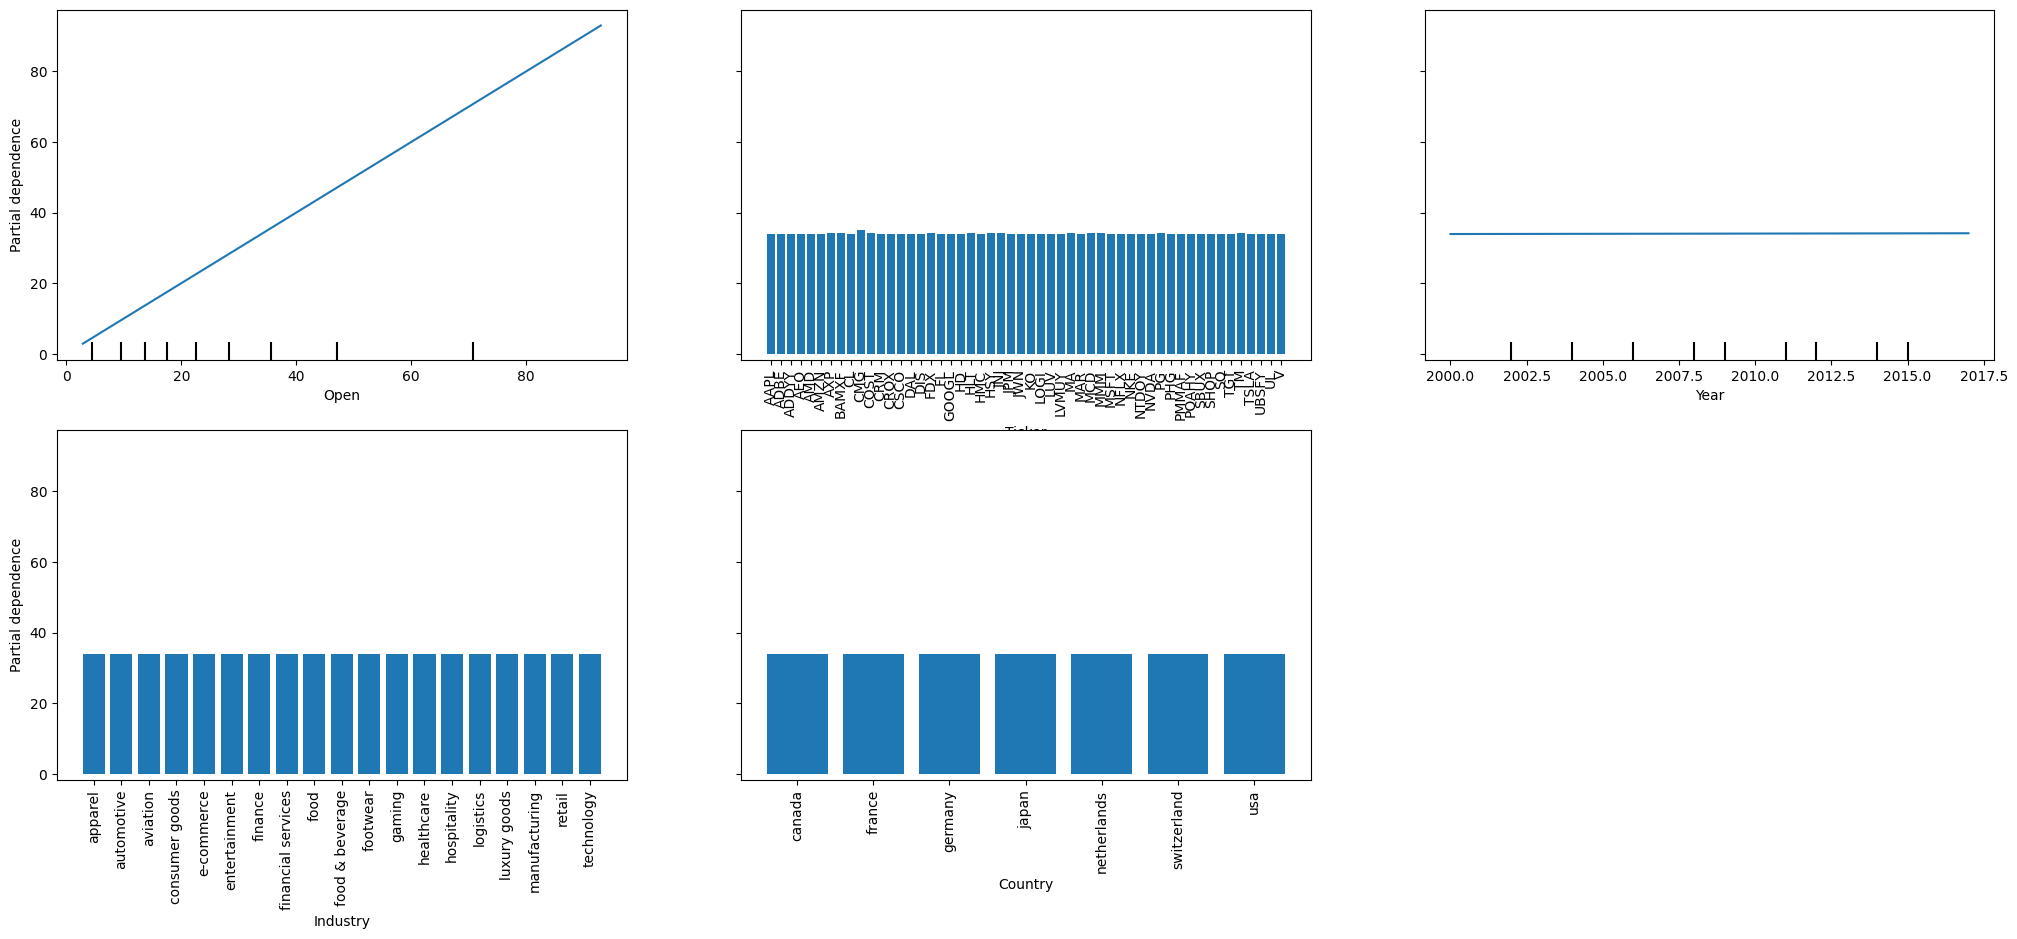

In [76]:
#Partial dependence plot for most important features found
fig, ax = plt.subplots(figsize=(25,10))
categorical_features = [Important_feature_2, Important_feature_4, Important_feature_5] 
features = [Important_feature_1, Important_feature_2, Important_feature_3, Important_feature_4, Important_feature_5]
PartialDependenceDisplay.from_estimator(best_model, X_train, features, categorical_features = categorical_features, ax=ax)

Looking at the PDPs we can confirm our first assumption that mainly the feature "Open" influences our model predicition. We see that with rising values for the feature "Open" also the predicted target value increases. The PDPs of the other four features ("Ticker", "Year", "Industry" and "Country") barely influence the target value as we can observe an almost horizontal line for those PDPs. This effect could still occur because PDPs only show the average marginal effects and two opposite effects would equal each other out. Therefore we will check the ICE plots. 

### Individual Conditional Expectation (ICE)

Similar to a PDP, an ICE plot shows the dependence between the target function and an input feature of interest. However, unlike a PDP, which shows the average effect of the input feature, an ICE plot visualizes the dependence of the prediction on a feature for each sample separately with one line per sample.

We can thereby check whether the horizontal line in the PDP is caused by opposite effects or because features really have no influence on our target value. 

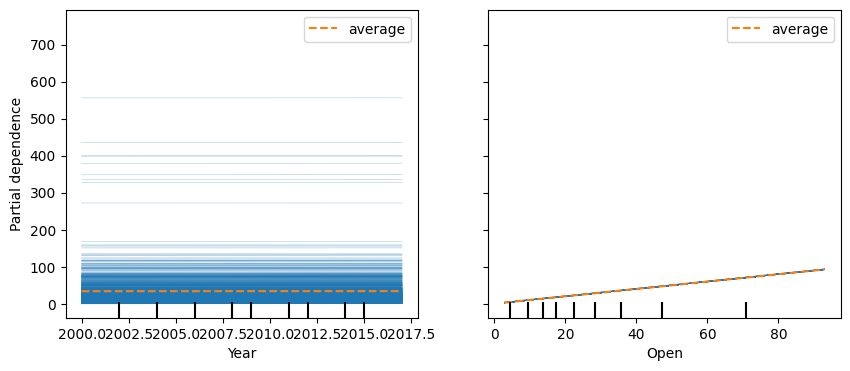

In [77]:
#Individual Conditional Expectation (ICE)
fig, ax = plt.subplots(figsize=(10,4))
features = ['Year', 'Open']
PartialDependenceDisplay.from_estimator(best_model, X_train, features, categorical_features = categorical_features, kind='both', ax=ax)

Looking at the ICE plots also confirms the previous finding, that only the feature "Open" influneces the prediction of the target value as the feature "Year" for example also shows horizontal lines for each sample seperately.  

### Shapley Additive Explanations (SHAP)

Finally, we will use SHAP to see how much each feature contributes, either positively or negatively to the target variable. Therefore we will compute the SHAP values for each observation (we will only do it for the first 200 data points as otherwise this will be too computationally expensive). 

In [78]:
features_transformed=list(pipeline_ElasticNet.named_steps['preprocessor'].get_feature_names_out())
features_transformed

['num__Year',
 'num__Month',
 'num__Day',
 'num__Dividends',
 'num__Stock Splits',
 'num__Volume',
 'num__Open',
 'onehot__Country_canada',
 'onehot__Country_france',
 'onehot__Country_germany',
 'onehot__Country_japan',
 'onehot__Country_netherlands',
 'onehot__Country_switzerland',
 'onehot__Country_usa',
 'onehot__UTC_Offset_-04:00',
 'onehot__UTC_Offset_-05:00',
 'target_enc__Ticker',
 'target_enc__Industry']

  0%|          | 0/200 [00:00<?, ?it/s]

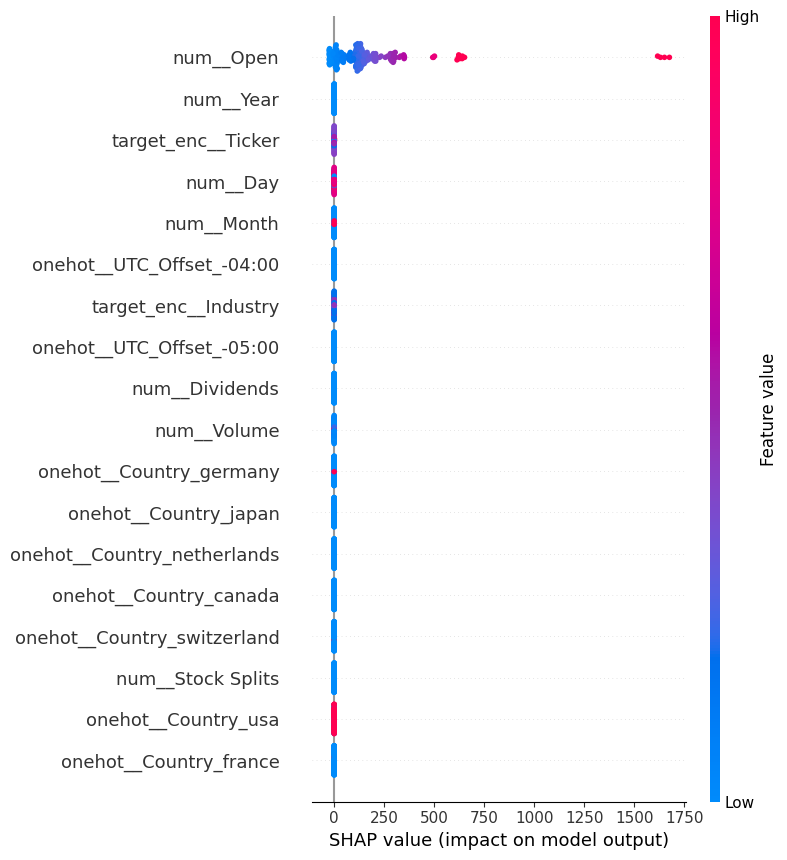

In [79]:
number_datapoints = 200
X_train_1 = best_model.named_steps['cleaning'].transform(X_train)
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train_1)
background_samples = shap.sample(X_train_processed, 100)

explainer = shap.KernelExplainer(best_model.named_steps['regressor'].predict, data=background_samples)

X_test_1 = best_model.named_steps['cleaning'].transform(X_test)
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test_1)
X_test_processed = pd.DataFrame(X_test_processed, columns=features_transformed)

shap_values = explainer.shap_values(X_test_processed[:number_datapoints])

shap.summary_plot(shap_values, X_test_processed[:number_datapoints], plot_type='dot')


Again also SHAP confirms that the feature "Open" is by far the most important feature and that the other features barely contribute to our prediciton. Furthermore, we can see that higher feature values also lead to higher predicted values of the target, which makes sense looking at the context that stock prices when markets close tend to be higher when the opening price was already high.  

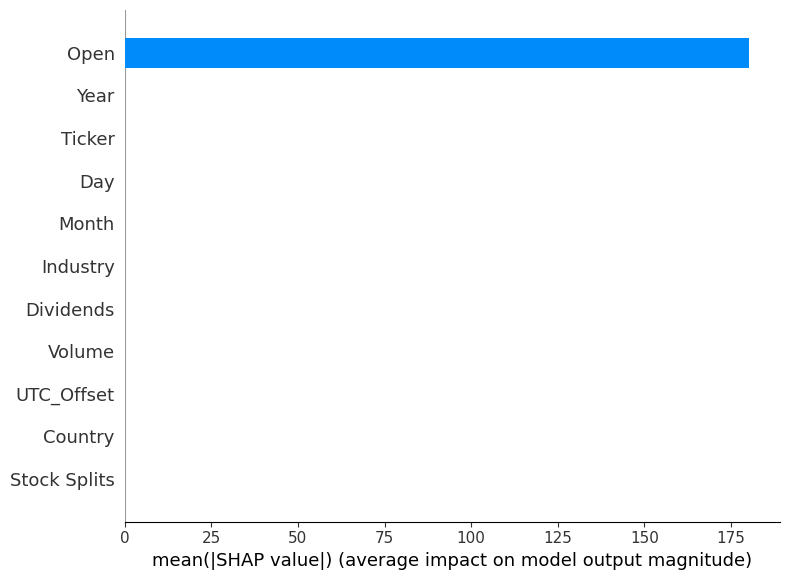

In [80]:
ohe_cols = ['Country', 'UTC_Offset']
other_cols = ['Year', 'Month', 'Day', 'Dividends', 'Stock Splits', 'Volume', 'Open', 'Ticker', 'Industry']
new_shap = np.empty(shape=(number_datapoints, len(X_train.columns)))

for col in ohe_cols:
    idx_original = list(X_train.columns).index(col)
    idx_transformed = [features_transformed.index(feat) for feat in features_transformed if feat.startswith('one_hot__' + col)]
    new_shap[:, idx_original] = np.sum(shap_values[:, idx_transformed], axis=1)
for col in other_cols:
    idx_original = list(X_train.columns).index(col)
    idx_transformed = [features_transformed.index(feat) for feat in features_transformed if feat.endswith(col)]
    new_shap[:, idx_original] = np.squeeze(shap_values[:, idx_transformed])

shap.summary_plot(new_shap, X_test[:number_datapoints], plot_type='bar')

In order to measure the total effect of all the categories of a categorical feature to capture its impact before one-hot encoding, we sum the Shapley values of all dummy variables corresponding to a feature. We can still observe the same result. 

### Local Interpretable Model-Agnostic Explanantions (LIME)

In the case of regression models, LIME provides local explanations for individual predictions by approximating the behavior of the complex regression model in the vicinity of a specific data point. As we are rather interested in global explanations and as one hot encoded variables cannot be passed directly to LIME we decided to not further investigate the final model interpretability using LIME.